In [2]:
!pip install hmms pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.8/524.8 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cus

In [3]:
import numpy as np
import pandas as pd
import hmms
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import os
import warnings
warnings.filterwarnings('ignore')

#### Import data obtained after cleaning in GWP1.

In [4]:
df = pd.read_csv('cleaned_result_iforest.csv')
df.drop('Unnamed: 0', axis=1,  inplace=True)
df.head()

,period,PAPR_NONOPEC,PAPR_OPEC,PATC_OECD,PATC_NON_OECD,COPRPUS,CORIPUS,PASC_OECD_T3,COPS_OPEC,COPC_OPEC,...,Political Stability Index LCA,Political Stability Index LBY,Political Stability Index MYS,Political Stability Index SYR,Political Stability Index SDN,Political Stability Index TKM,Political Stability Index TTO,Political Stability Index TUN,Political Stability Index UZB,Political Stability Index YEM
0,2000-01-01,47.662093,28.008193,47.226772,28.286122,5.784376,13.779,2709.462514,5.984101,31.236635,...,1.2236,-0.294287,0.092691,-0.180451,-2.244173,0.008447,0.153456,0.321115,-1.30195,-1.145441
1,2000-02-01,47.582217,28.671193,50.229341,28.770679,5.851839,14.028,2709.462514,5.321119,31.236635,...,1.2236,-0.294287,0.092691,-0.180451,-2.244173,0.008447,0.153456,0.321115,-1.30195,-1.145441
2,2000-03-01,47.696975,28.605599,49.358083,28.528547,5.918207,14.613,2709.462514,5.387853,31.236635,...,1.2236,-0.294287,0.092691,-0.180451,-2.244173,0.008447,0.153456,0.321115,-1.30195,-1.145441
3,2000-04-01,56.526595,29.552483,46.286749,43.578956,5.854166,15.053,2709.462514,4.469957,31.236635,...,1.2236,-0.294287,0.092691,-0.180451,-2.244173,0.008447,0.153456,0.321115,-1.30195,-1.145441
4,2000-05-01,47.383670,30.081687,47.338795,28.216862,5.846510,15.494,2709.462514,3.948044,31.236635,...,1.2236,-0.294287,0.092691,-0.180451,-2.244173,0.008447,0.153456,0.321115,-1.30195,-1.145441


In [5]:
df = df.set_index('period')
df.head()

,PAPR_NONOPEC,PAPR_OPEC,PATC_OECD,PATC_NON_OECD,COPRPUS,CORIPUS,PASC_OECD_T3,COPS_OPEC,COPC_OPEC,T3_STCHANGE_OOECD,...,Political Stability Index LCA,Political Stability Index LBY,Political Stability Index MYS,Political Stability Index SYR,Political Stability Index SDN,Political Stability Index TKM,Political Stability Index TTO,Political Stability Index TUN,Political Stability Index UZB,Political Stability Index YEM
period,,,,,,,,,,,,,,,,,,,,,
2000-01-01,47.662093,28.008193,47.226772,28.286122,5.784376,13.779,2709.462514,5.984101,31.236635,0.036408,...,1.2236,-0.294287,0.092691,-0.180451,-2.244173,0.008447,0.153456,0.321115,-1.30195,-1.145441
2000-02-01,47.582217,28.671193,50.229341,28.770679,5.851839,14.028,2709.462514,5.321119,31.236635,0.036408,...,1.2236,-0.294287,0.092691,-0.180451,-2.244173,0.008447,0.153456,0.321115,-1.30195,-1.145441
2000-03-01,47.696975,28.605599,49.358083,28.528547,5.918207,14.613,2709.462514,5.387853,31.236635,0.036408,...,1.2236,-0.294287,0.092691,-0.180451,-2.244173,0.008447,0.153456,0.321115,-1.30195,-1.145441
2000-04-01,56.526595,29.552483,46.286749,43.578956,5.854166,15.053,2709.462514,4.469957,31.236635,0.036408,...,1.2236,-0.294287,0.092691,-0.180451,-2.244173,0.008447,0.153456,0.321115,-1.30195,-1.145441
2000-05-01,47.383670,30.081687,47.338795,28.216862,5.846510,15.494,2709.462514,3.948044,31.236635,0.036408,...,1.2236,-0.294287,0.092691,-0.180451,-2.244173,0.008447,0.153456,0.321115,-1.30195,-1.145441


Data cleaning is the second stage of data preprocessing. The following stages are data transformation and data discretisation.

#### Data Transformation
Divide the dataset into training, validation and test sets after adding a ```forecast``` column to the dataset. This column will have the price of crude oil for the following month.

In [6]:
df['forecast'] = df['WTISPLC'].shift(-1)

In [7]:
train_data = df[: int(df.shape[0] * 0.80)]
vald_data = df[int(0.80 * df.shape[0]) : int(0.90 * df.shape[0])]
test_data = df[int(0.90* df.shape[0]) : int(df.shape[0])]

#### Data Discretisation and Time Series Transformation

In [10]:
price = train_data['WTISPLC']

# The first value is NaN as there is not a previous month to compare with
price_diff = price.diff()[1:]

# Replacing the change with 1 if positive, else 0
e_seq = np.array(price_diff.apply(lambda x: 1 if x > 0 else 0).values)

In [11]:
dhmm_r = hmms.DtHMM.random(3 , 2)
e_seq = np.array_split(e_seq, 32)

# Baum-Welch Algorithm
dhmm_r.baum_welch(e_seq, 100) # 100 iterations

iteration  1 / 100
iteration  2 / 100
iteration  3 / 100
iteration  4 / 100
iteration  5 / 100
iteration  6 / 100
iteration  7 / 100
iteration  8 / 100
iteration  9 / 100
iteration  10 / 100
iteration  11 / 100
iteration  12 / 100
iteration  13 / 100
iteration  14 / 100
iteration  15 / 100
iteration  16 / 100
iteration  17 / 100
iteration  18 / 100
iteration  19 / 100
iteration  20 / 100
iteration  21 / 100
iteration  22 / 100
iteration  23 / 100
iteration  24 / 100
iteration  25 / 100
iteration  26 / 100
iteration  27 / 100
iteration  28 / 100
iteration  29 / 100
iteration  30 / 100
iteration  31 / 100
iteration  32 / 100
iteration  33 / 100
iteration  34 / 100
iteration  35 / 100
iteration  36 / 100
iteration  37 / 100
iteration  38 / 100
iteration  39 / 100
iteration  40 / 100
iteration  41 / 100
iteration  42 / 100
iteration  43 / 100
iteration  44 / 100
iteration  45 / 100
iteration  46 / 100
iteration  47 / 100
iteration  48 / 100
iteration  49 / 100
iteration  50 / 100
iteration

In [12]:
hmms.print_parameters(dhmm_r)

Initial probabilities (π) :


,0
0,0.027202
1,0.000066
2,0.972732


Transition probabilities matrix (A):


,0,1,2
0,0.260612,0.622153,0.117235
1,0.234657,0.000447,0.764896
2,0.002621,0.997365,0.000015


Emission probabilities matrix (B):


,0,1
0,0.010917,0.989083
1,0.525911,0.474089
2,0.350368,0.649632


Instead of calling the viterbi function through the hmms package used in the paper, a bespoke one is utilized. There appears to be an issue with the numpy. Thus, a custom version of the viterbi function in hmms is used.

In [15]:
def custom_viterbi(e_seq, loga, logb, logpi):
    """
    From given emission sequence and parameters calculate the most likely state sequence

    Parameters
    ----------
    e_seq:  ndarray, int
            observation (emission) symbols sequence
    loga:   ndarray, float
            log of transition probability matrix
    logb:   ndarray, float
            log of emission probability matrix
    logpi:  ndarray, float
            log of initial state probability vector

    Returns
    -------
    (max_p, path) :  max_p: probability of the most likely state sequence
                     path: most likely state sequence
    """

    size = e_seq.shape[0]
    states_num = loga.shape[0]

    # Initialize the delta and psi matrices
    delta = np.empty((size, states_num), dtype=np.float64)
    psi = np.empty((size, states_num), dtype=int)

    # Initialization step
    delta[0, :] = logpi + logb[:, int(e_seq[0])]
    psi[0, :] = 0

    # Recursion step
    for i in range(1, size):
        for s in range(states_num):
            delta[i, s] = delta[i - 1, 0] + loga[0, s]
            psi[i, s] = 0

            for r in range(1, states_num):
                if delta[i, s] < delta[i - 1, r] + loga[r, s]:
                    delta[i, s] = delta[i - 1, r] + loga[r, s]
                    psi[i, s] = r

            delta[i, s] += logb[s, e_seq[i]]

    # Termination step
    max_p = delta[-1, 0]
    p = 0

    for s in range(1, states_num):
        if max_p < delta[-1, s]:
            max_p = delta[-1, s]
            p = s

    # Path backtracking
    path = np.full(size, 0, dtype=int)

    for i in range(size - 1, -1, -1):
        path[i] = p
        p = psi[i, p]

    return max_p, path

# Define states, start probabilities, transition probabilities, and emission probabilities
start_prob = dhmm_r.pi
trans_prob = dhmm_r.a
emit_prob = dhmm_r.b

# Convert the parameters to log space
log_trans_prob = np.log(trans_prob)
log_emit_prob = np.log(emit_prob)
log_start_prob = np.log(start_prob)

# Convert e_seq back to a single array for the Viterbi algorithm
observations = np.concatenate(e_seq).ravel()

# Run the custom Viterbi algorithm
log_prob, s_seq = custom_viterbi(observations, log_trans_prob, log_emit_prob, log_start_prob)

print("Most Likely Sequence of Hidden States:", s_seq)

Most Likely Sequence of Hidden States: [2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 0 1 2 1 2 1 2
 1 2 1 2 1 2 1]


In [16]:
## Multicolored time series plot
price_plot = pd.DataFrame({
    'WTISPLC': price[1:],
    'Regime': s_seq,
    'diff': price_diff
}, index=price.index[1:])

In [17]:
price_plot

,WTISPLC,Regime,diff
period,,,
2000-02-01,29.35,2,2.17
2000-03-01,29.89,1,0.54
2000-04-01,25.74,2,-4.15
2000-05-01,28.78,1,3.04
2000-06-01,31.83,2,3.05
...,...,...,...
2018-10-01,70.75,1,0.52
2018-11-01,56.96,2,-13.79
2018-12-01,49.52,1,-7.44


In [18]:
# Get means of all assigned states
means = price_plot.groupby(['Regime'])['diff'].mean()
lst_1 = means.index.tolist()
lst_2 = means.sort_values().index.tolist()
map_regimes = dict(zip(lst_2, lst_1))
price_plot['Regime'] = price_plot['Regime'].map(map_regimes)

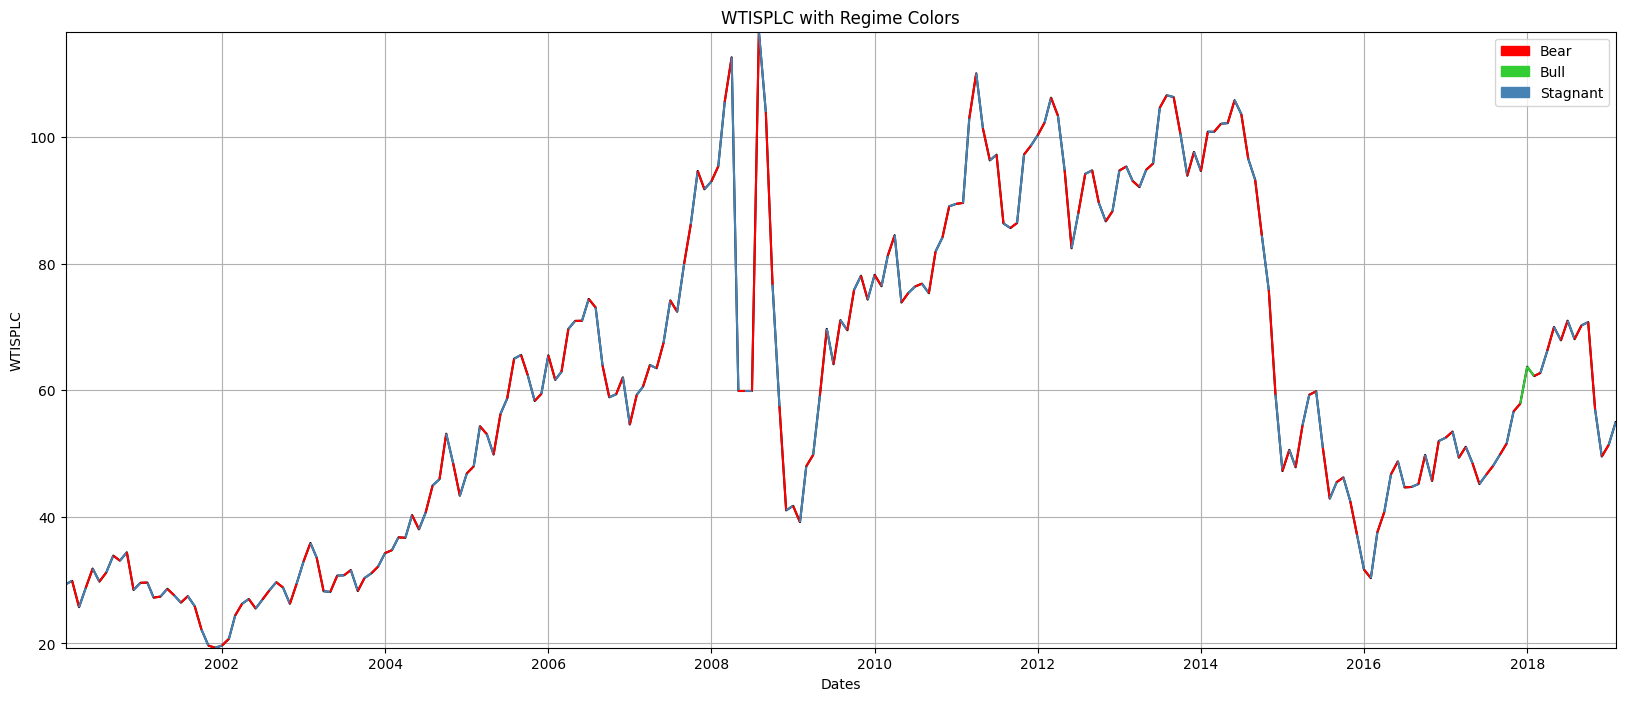

In [23]:
# Ensure index is in DatetimeIndex format
if not isinstance(price_plot.index, pd.DatetimeIndex):
    price_plot.index = pd.to_datetime(price_plot.index)

fig, ax1 = plt.subplots(figsize=(20,8))

# Plot the price data
ax1.plot(price_plot['WTISPLC'], color='black', label='WTISPLC')

# Create color map and boundary norm
cmap = ListedColormap(['r', 'steelblue', 'limegreen'], name='indexed')
norm = BoundaryNorm([0, 1, 2, 3], cmap.N)

# Convert index to numerical values for plotting
inxval = mdates.date2num(price_plot.index.to_pydatetime())
points = np.array([inxval, price_plot['WTISPLC']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create LineCollection with color mapping based on regime
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(price_plot['Regime'].astype(float))

# Add collection to axis
ax1.add_collection(lc)
ax1.autoscale()  # Automatically scale the plot to include the collection
ax1.set_xlim(price_plot.index.min(), price_plot.index.max())
ax1.set_ylim(price_plot['WTISPLC'].min(), price_plot['WTISPLC'].max())

# Create legend for regimes
r_patch = mpatches.Patch(color='red', label='Bear')
g_patch = mpatches.Patch(color='limegreen', label='Bull')
b_patch = mpatches.Patch(color='steelblue', label='Stagnant')
ax1.legend(handles=[r_patch, g_patch, b_patch])

plt.xlabel('Dates')
plt.ylabel('WTISPLC')
plt.title('WTISPLC with Regime Colors')
plt.grid()
plt.show()

In [24]:
output_dir = "./hmms/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Training HMMs
for series_id in df:
    if series_id == 'forecast':
        break
    else:
        dhmm = hmms.DtHMM.random(3, 2)
        data_diff = train_data[series_id].diff()[1:]

        # Apply the lambda function and convert the result to integers
        emit_seq = np.array_split(data_diff.apply(lambda x: 1 if x > 0 else 0).values.astype(int), 32)

        # Run the Baum-Welch algorithm
        dhmm.baum_welch(emit_seq, 100)

        # Save the parameters
        path = "./hmms/" + series_id.replace(".", "_")
        dhmm.save_params(path)

Streaming output truncated to the last 5000 lines.
iteration  1 / 100
iteration  2 / 100
iteration  3 / 100
iteration  4 / 100
iteration  5 / 100
iteration  6 / 100
iteration  7 / 100
iteration  8 / 100
iteration  9 / 100
iteration  10 / 100
iteration  11 / 100
iteration  12 / 100
iteration  13 / 100
iteration  14 / 100
iteration  15 / 100
iteration  16 / 100
iteration  17 / 100
iteration  18 / 100
iteration  19 / 100
iteration  20 / 100
iteration  21 / 100
iteration  22 / 100
iteration  23 / 100
iteration  24 / 100
iteration  25 / 100
iteration  26 / 100
iteration  27 / 100
iteration  28 / 100
iteration  29 / 100
iteration  30 / 100
iteration  31 / 100
iteration  32 / 100
iteration  33 / 100
iteration  34 / 100
iteration  35 / 100
iteration  36 / 100
iteration  37 / 100
iteration  38 / 100
iteration  39 / 100
iteration  40 / 100
iteration  41 / 100
iteration  42 / 100
iteration  43 / 100
iteration  44 / 100
iteration  45 / 100
iteration  46 / 100
iteration  47 / 100
iteration  48 / 10

In [27]:
output_dir = "./data/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

disc_test = pd.DataFrame(index = train_data[1:].index)

# Loading HMMs and running Viterbi
for series_id in df:
    path = "./hmms/" + series_id.replace(".", "_") + ".npz"
    if series_id == 'forecast':
        dhmm = hmms.DtHMM.from_file('./hmms/WTISPLC.npz')
    else:
        dhmm = hmms.DtHMM.from_file(path)

    data_diff = train_data[series_id].diff()[1:]
    emit_seq = np.array(data_diff.apply(lambda x: 1 if x > 0 else 0).values.astype(int))

# Extract the parameters from the dhmm object
    loga = dhmm.a  # log of transition probabilities
    logb = dhmm.b  # log of emission probabilities
    logpi = dhmm.pi  # log of initial state probabilities

    # Call the viterbi function with all required arguments
    log_prob, s_seq = custom_viterbi(emit_seq, loga, logb, logpi)
    disc_test[series_id] = s_seq

disc_test.to_csv(output_dir + "train_data.csv")  # Saving to CSV

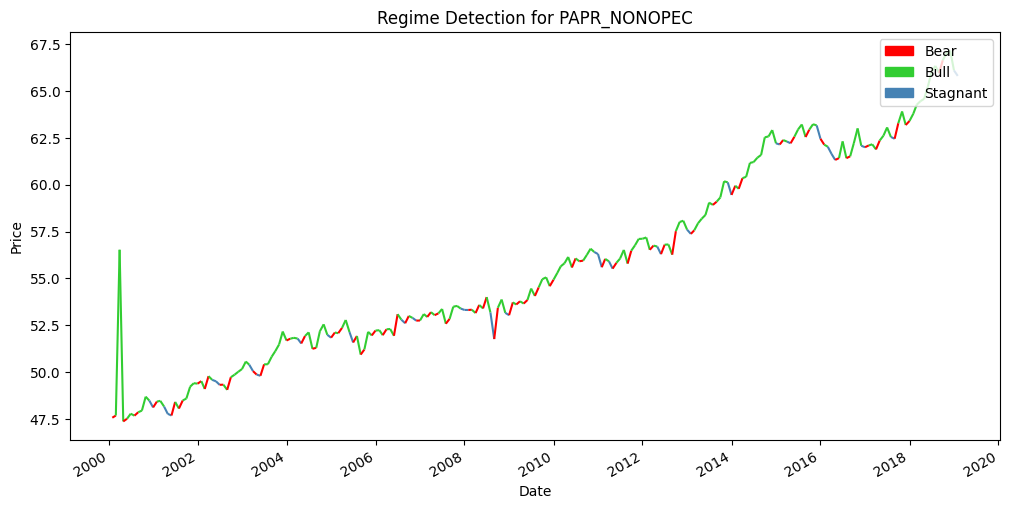

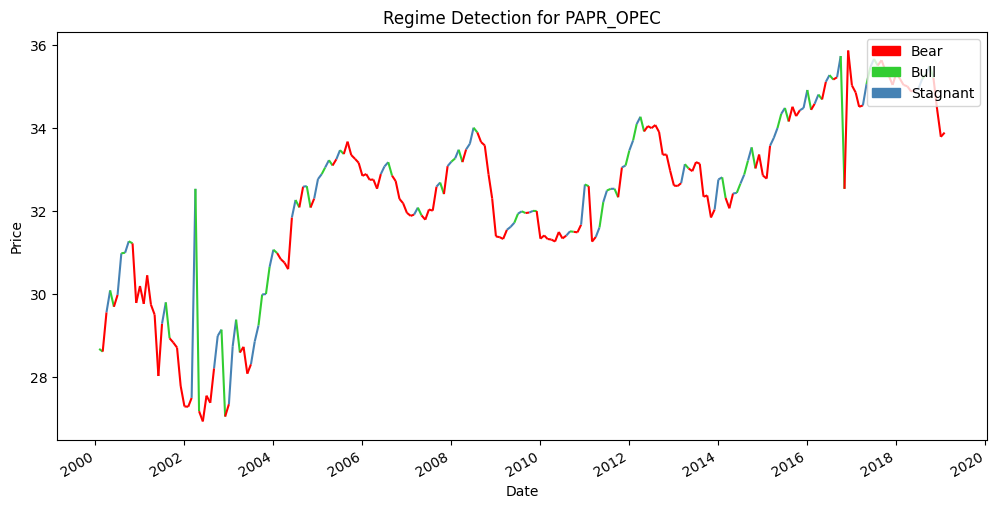

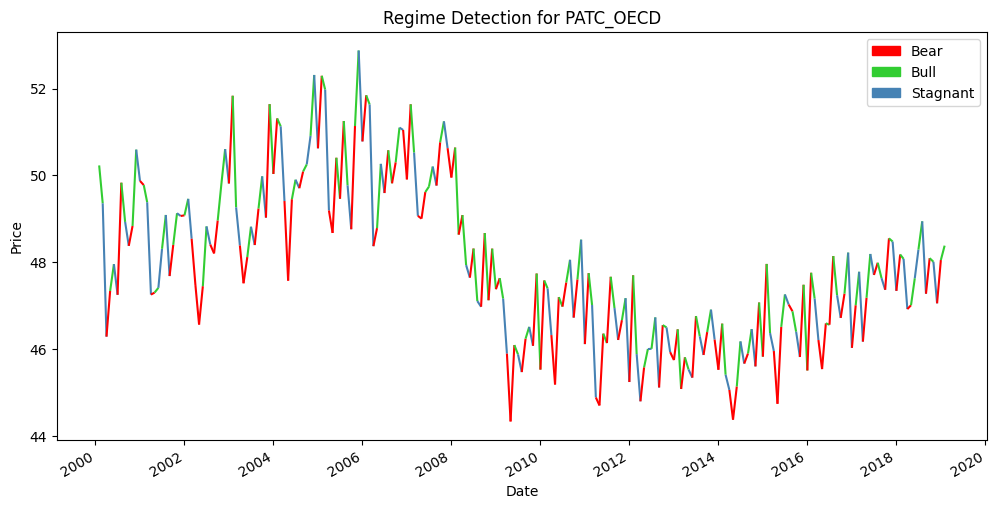

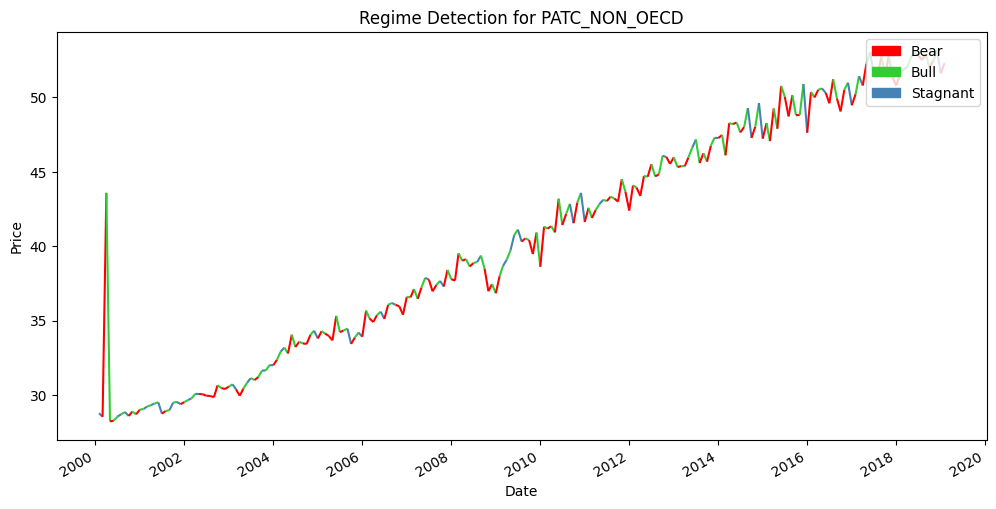

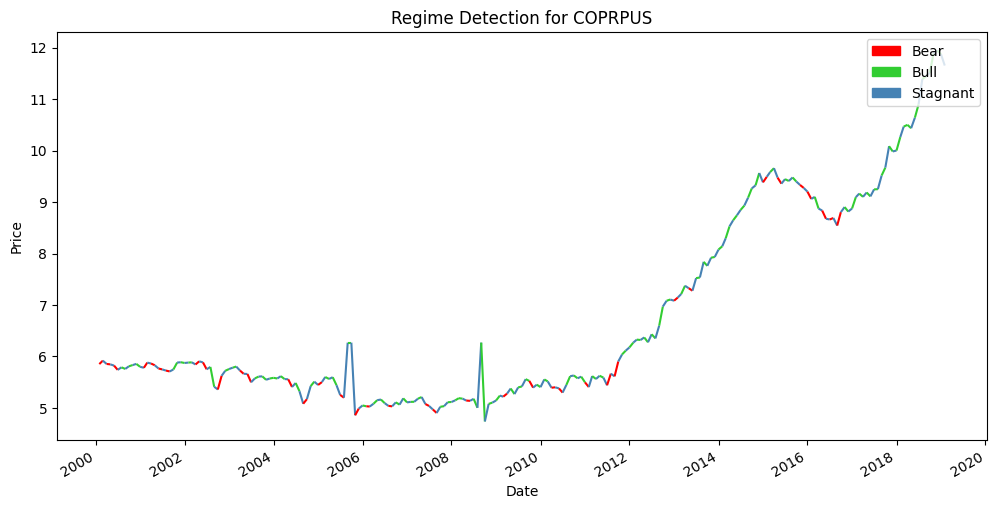

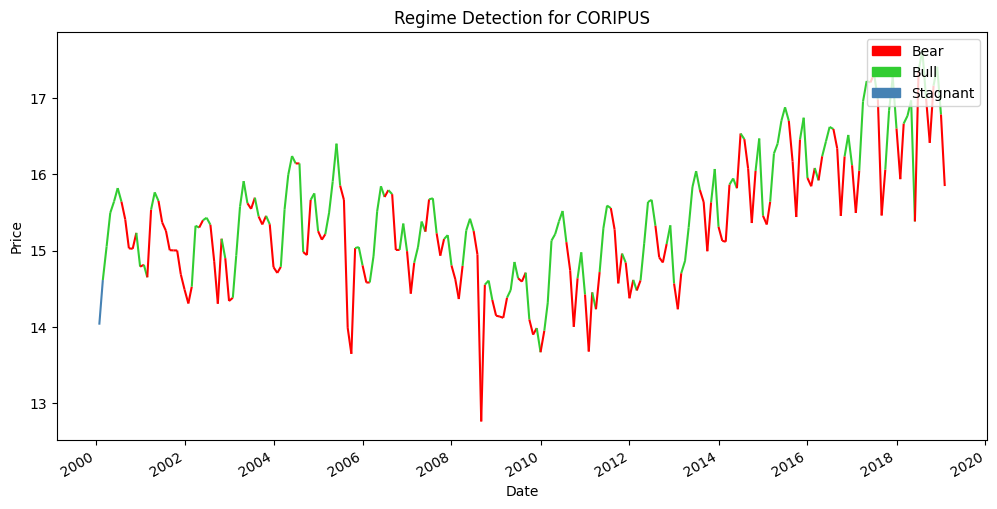

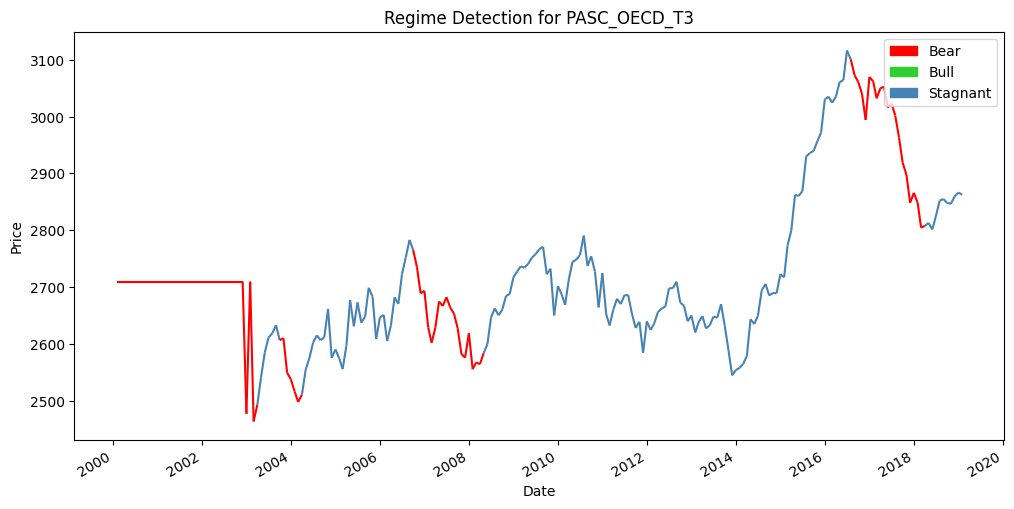

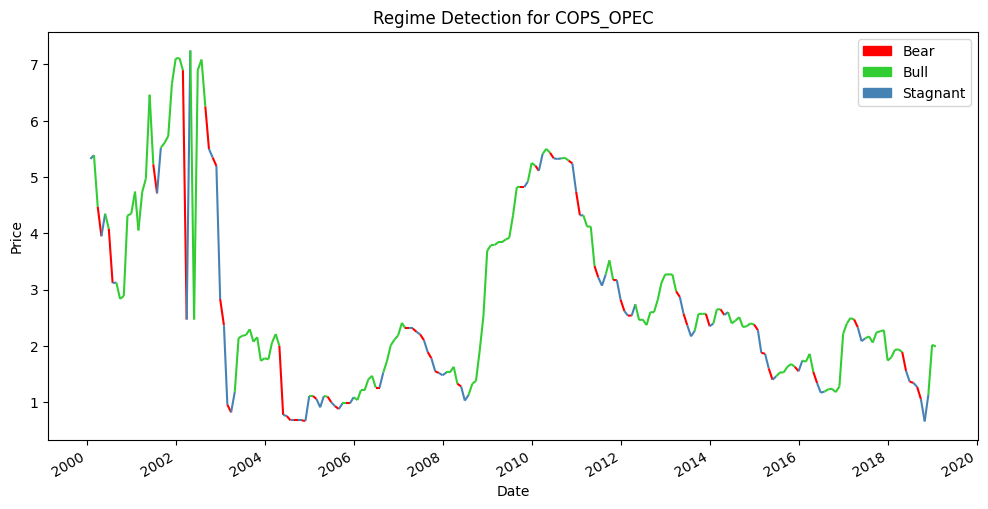

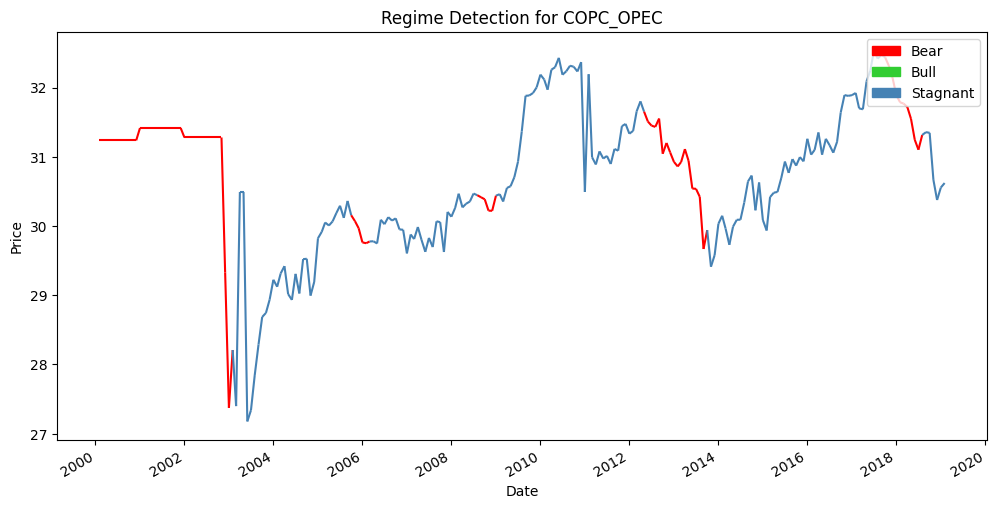

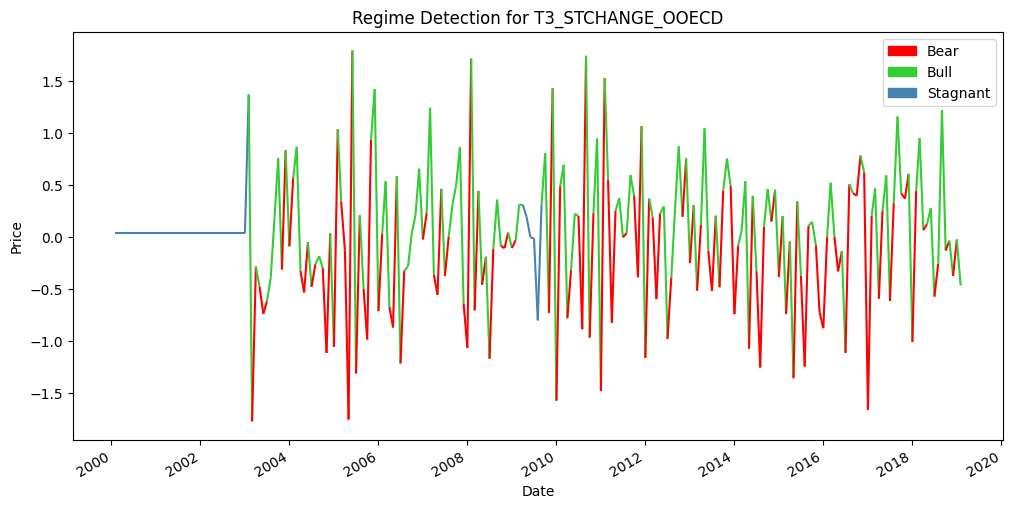

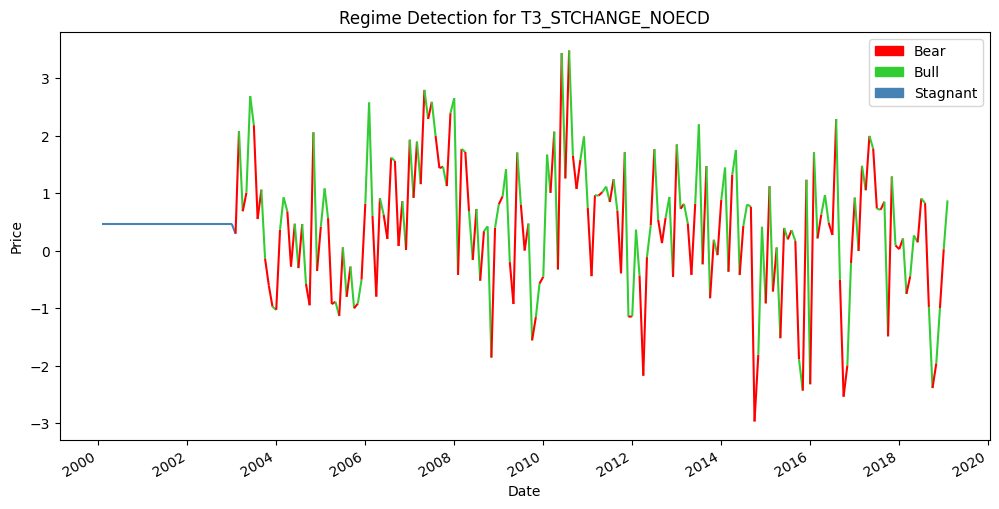

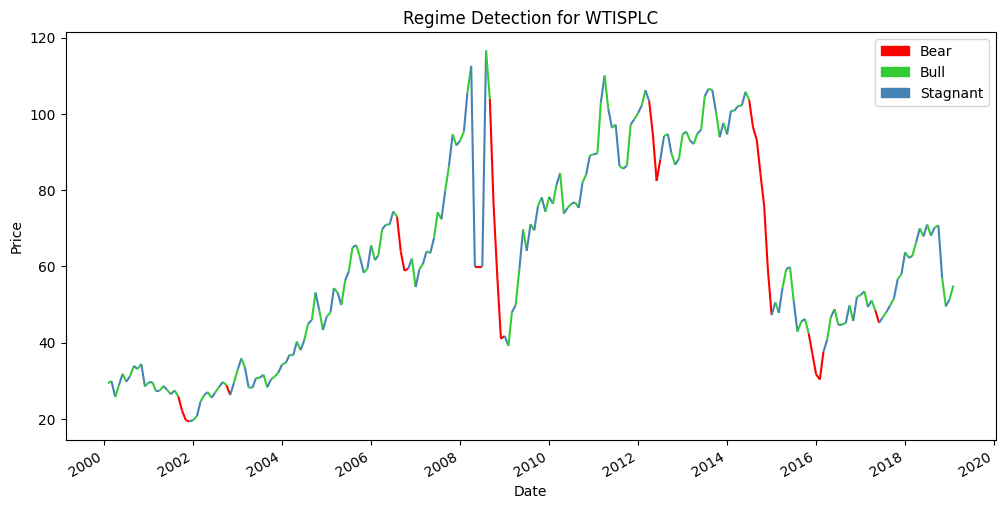

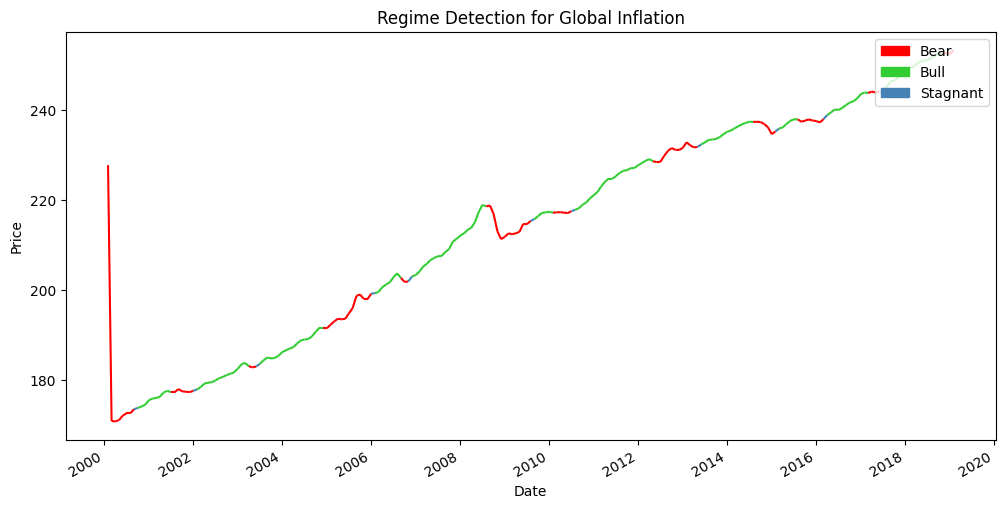

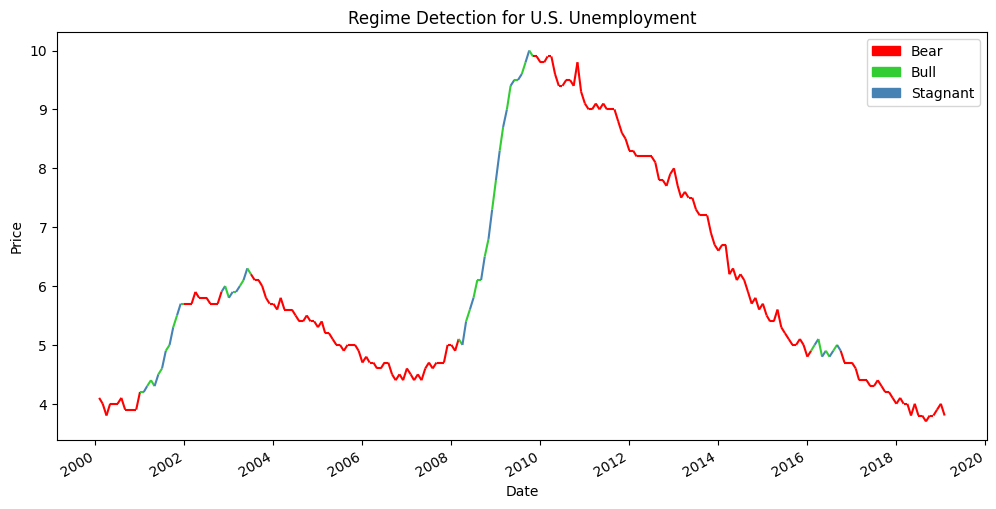

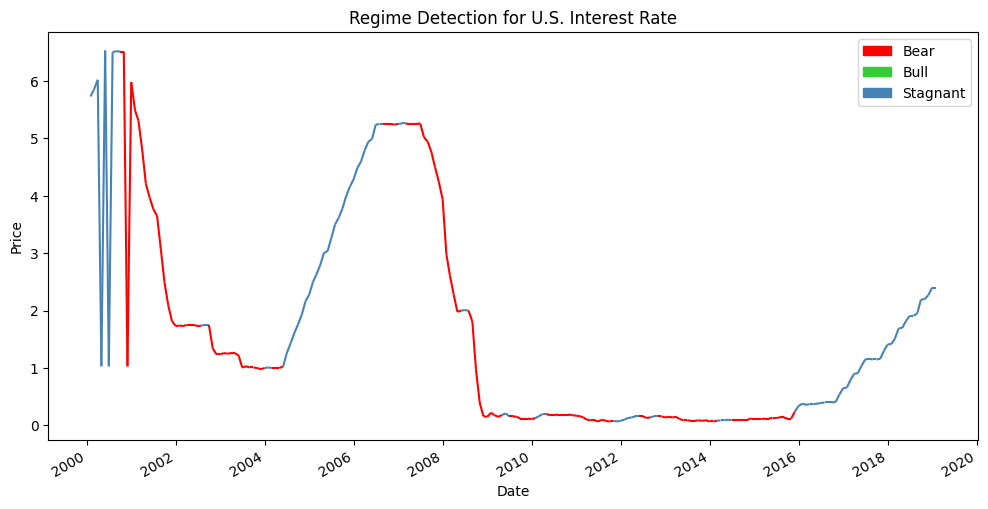

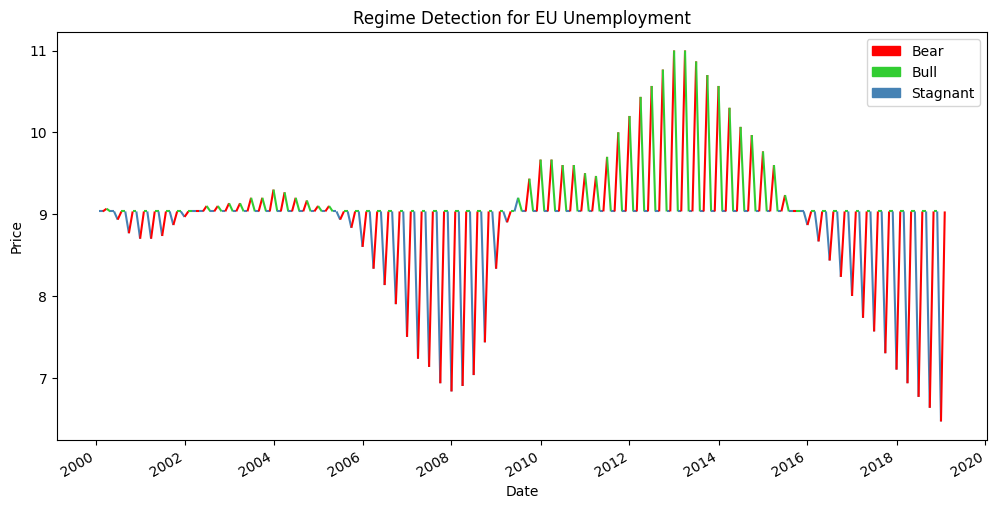

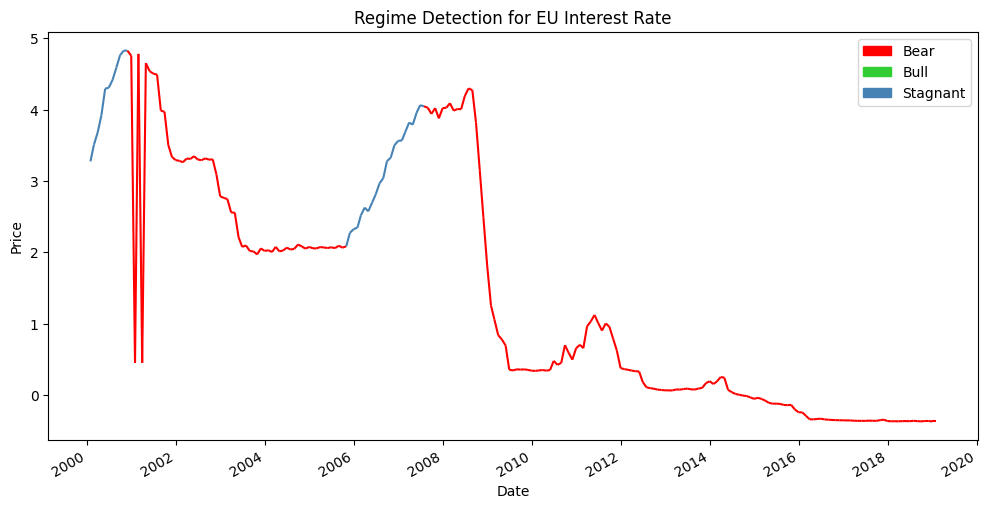

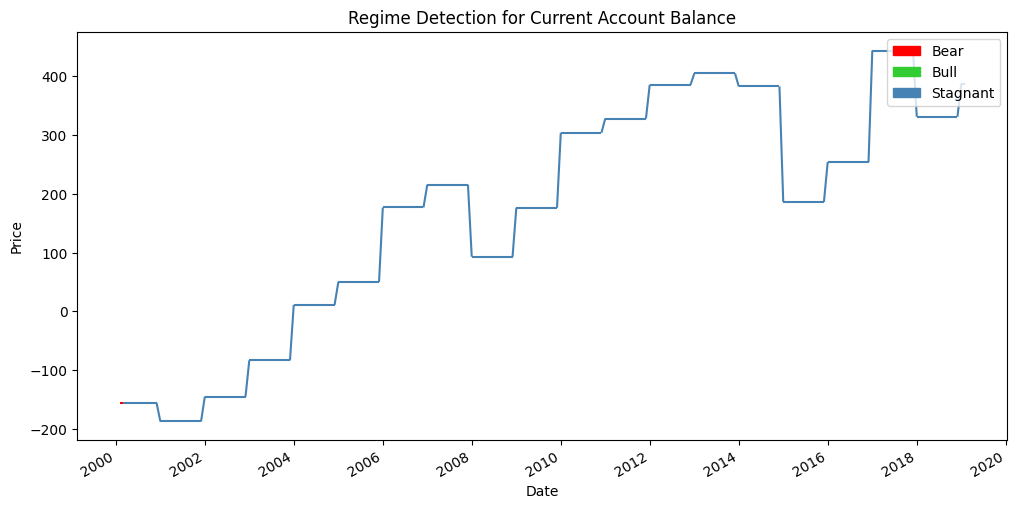

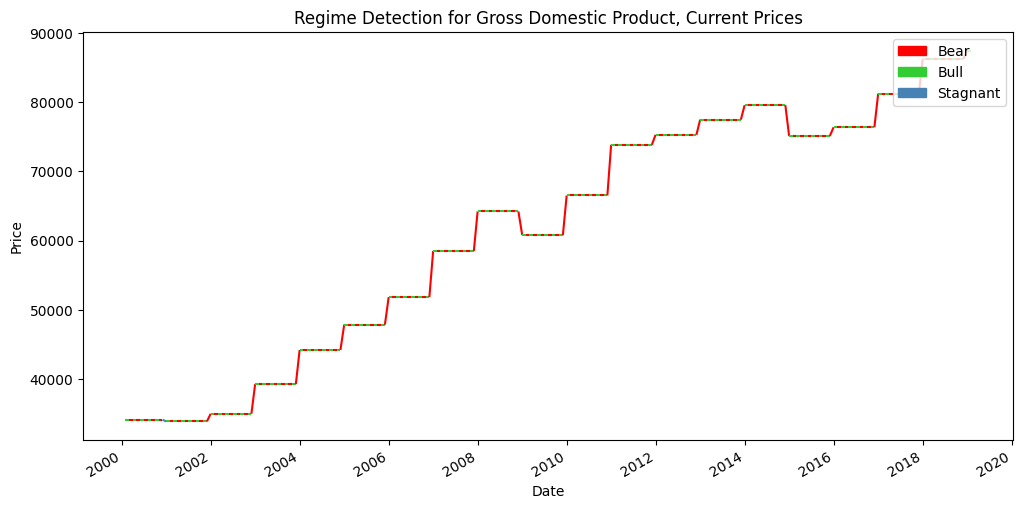

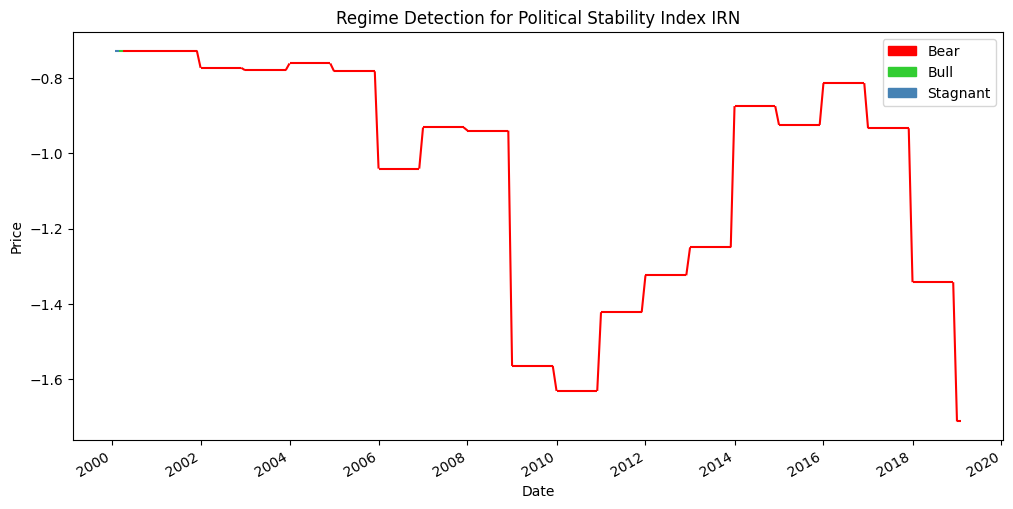

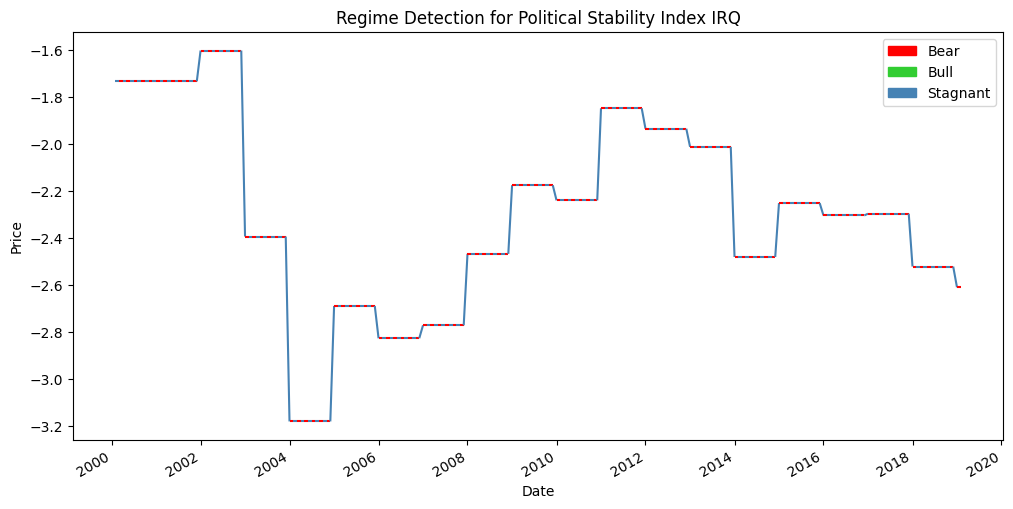

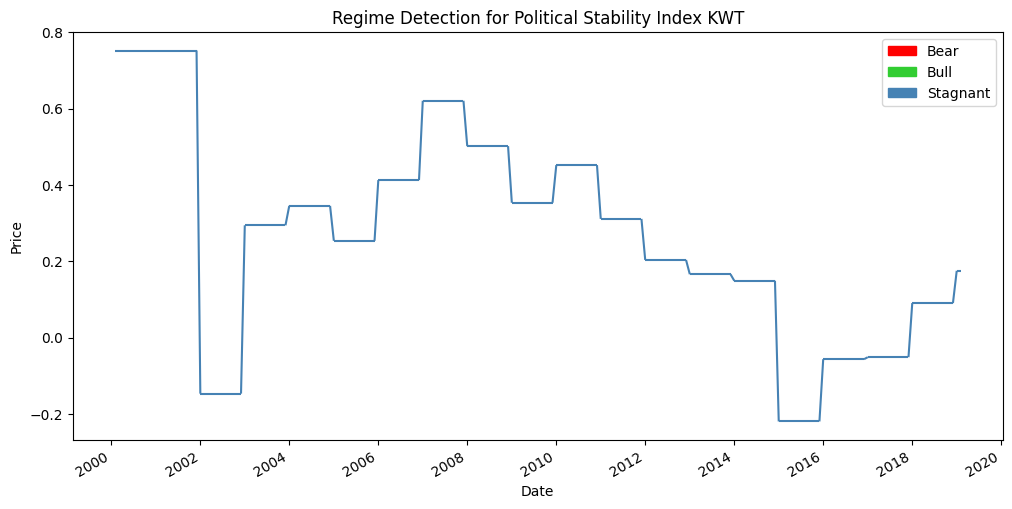

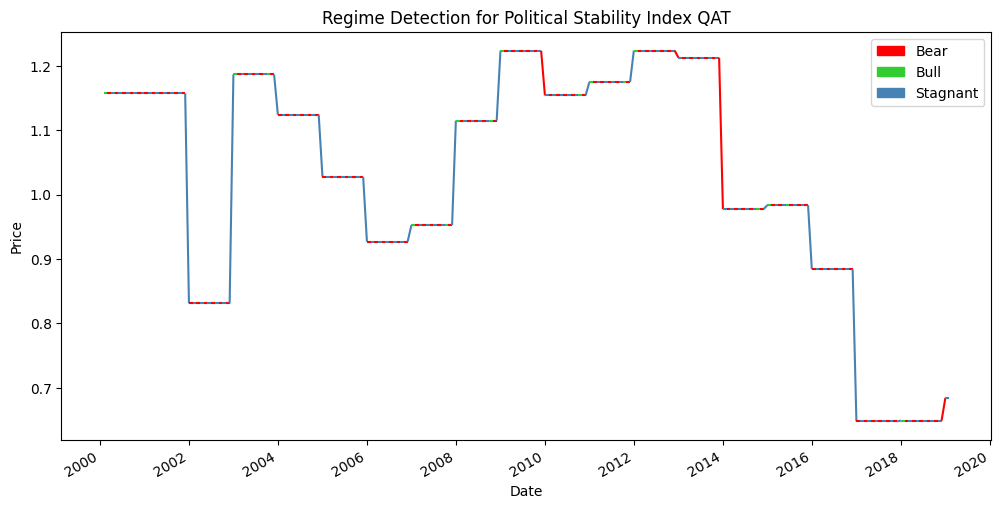

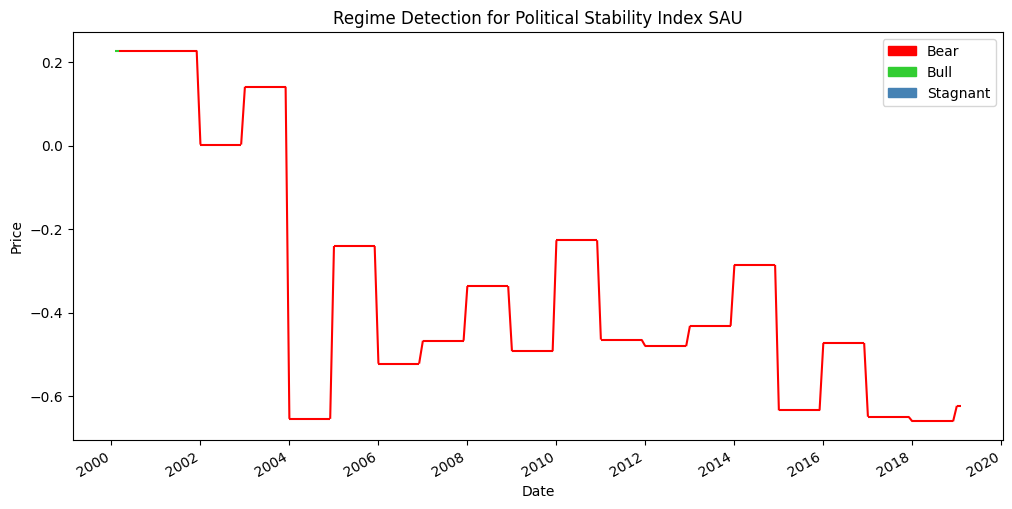

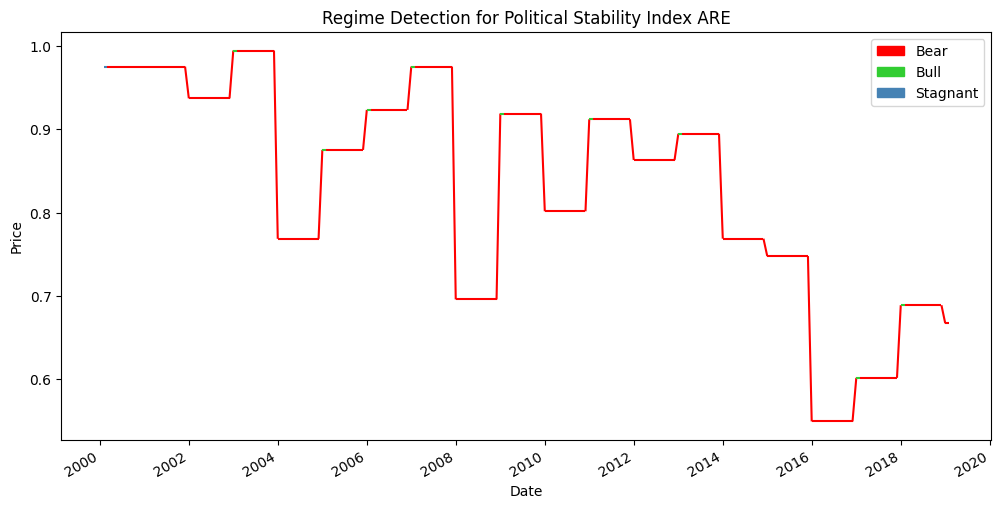

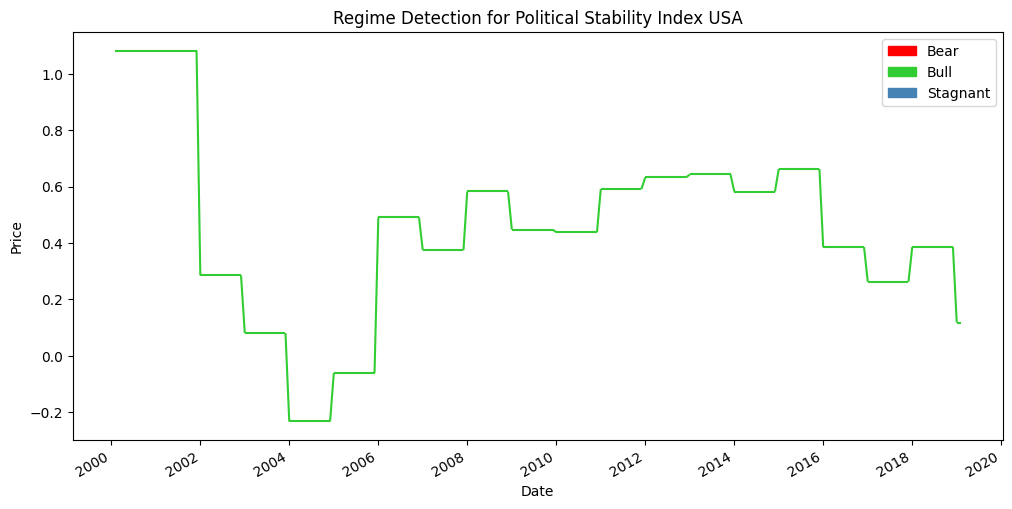

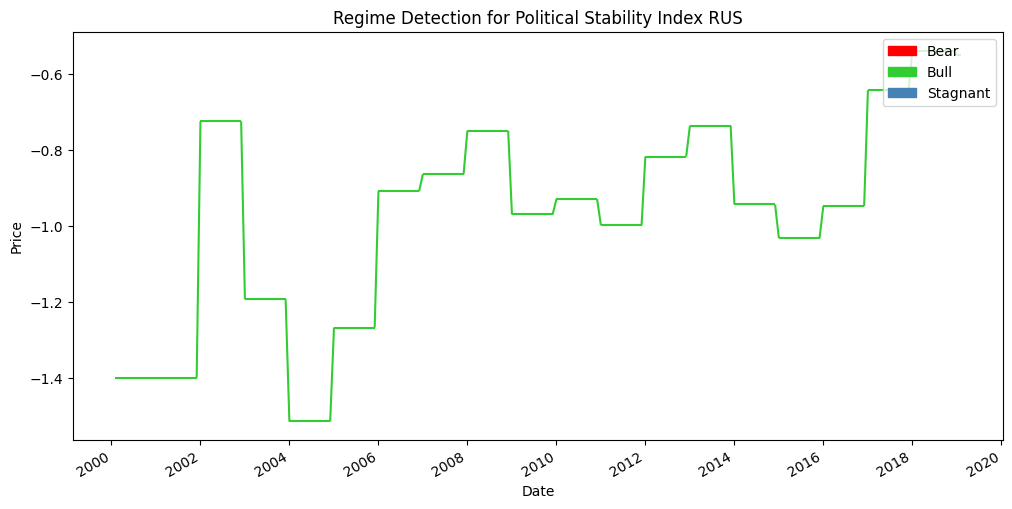

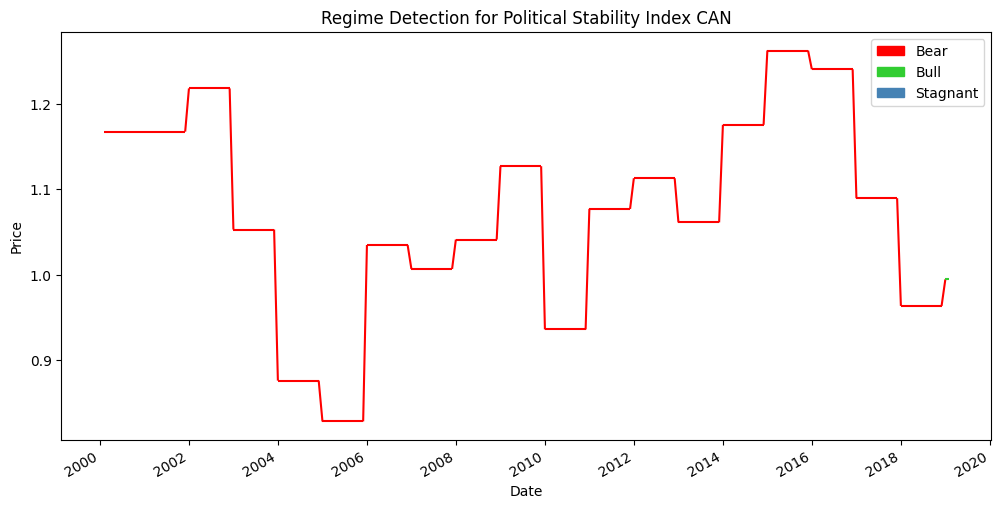

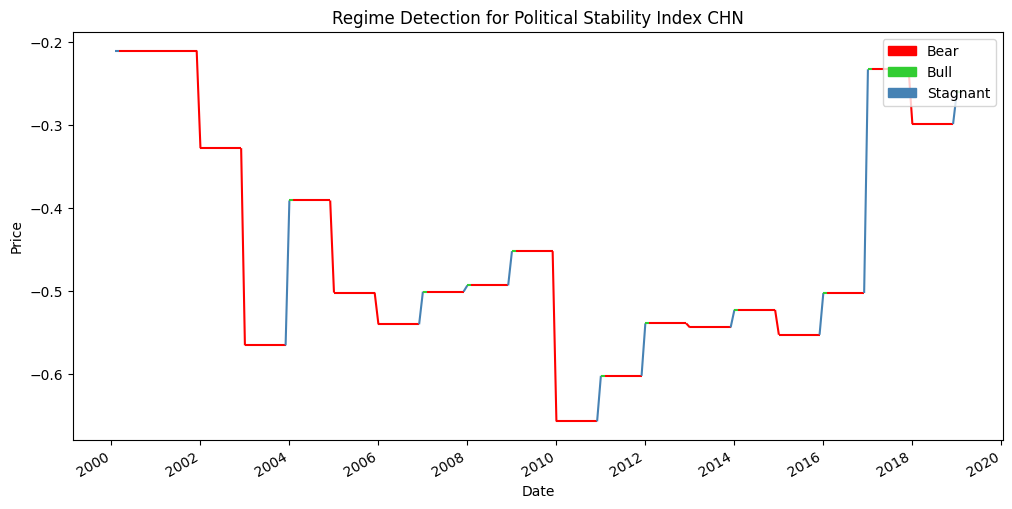

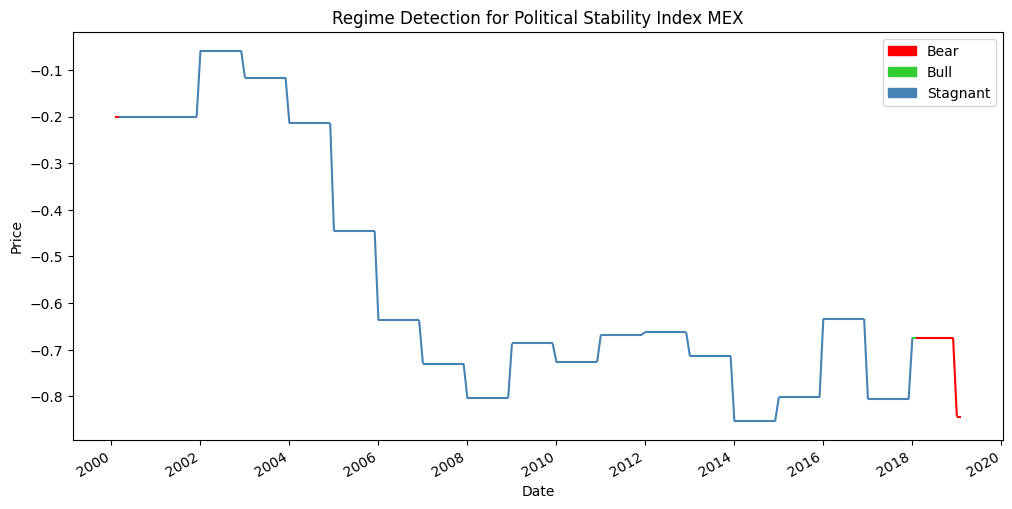

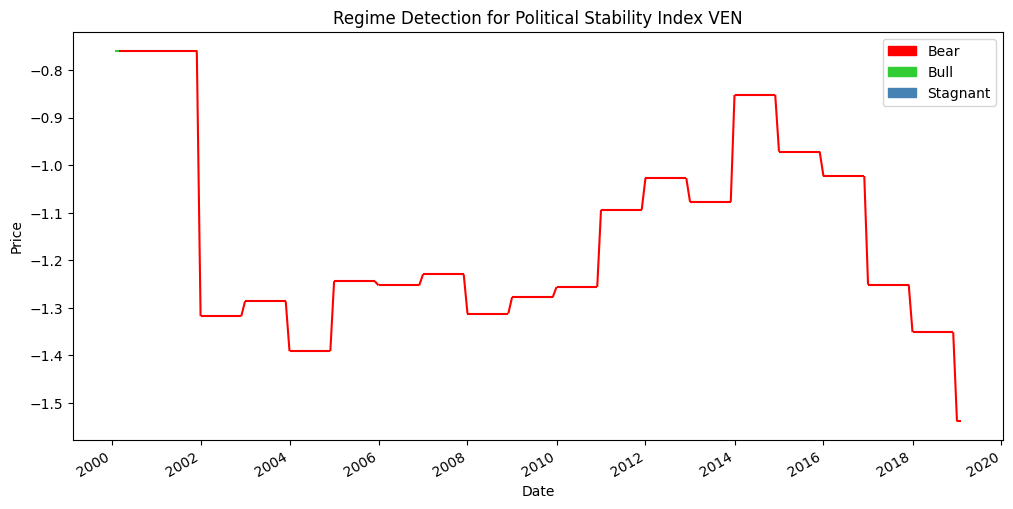

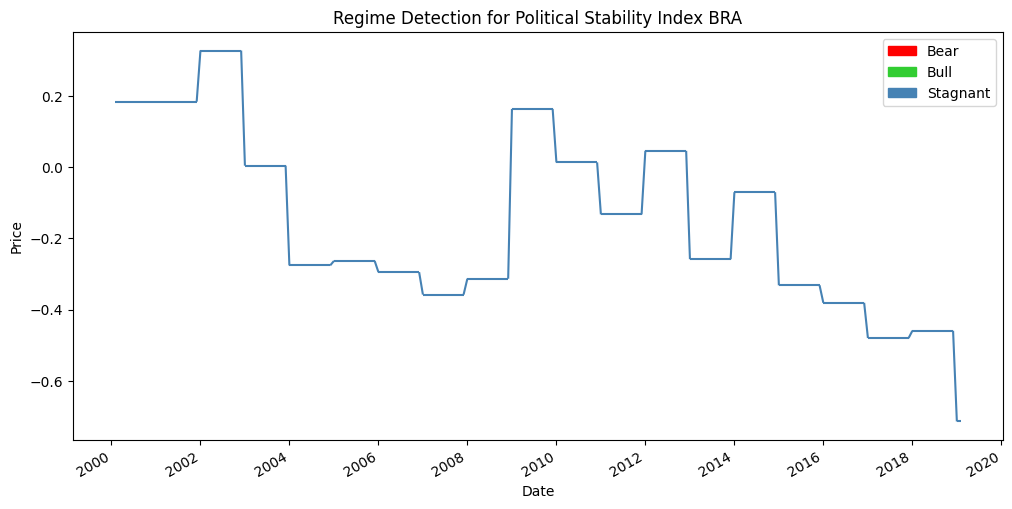

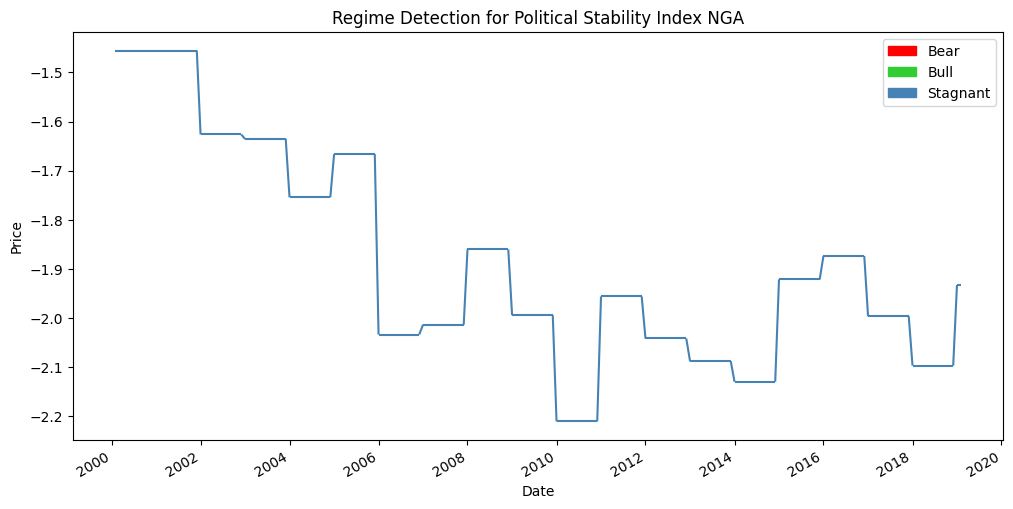

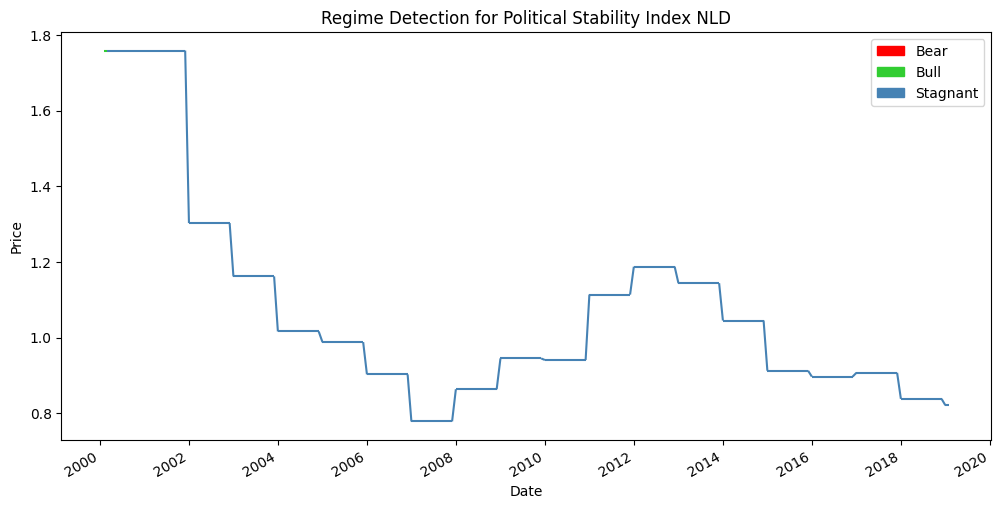

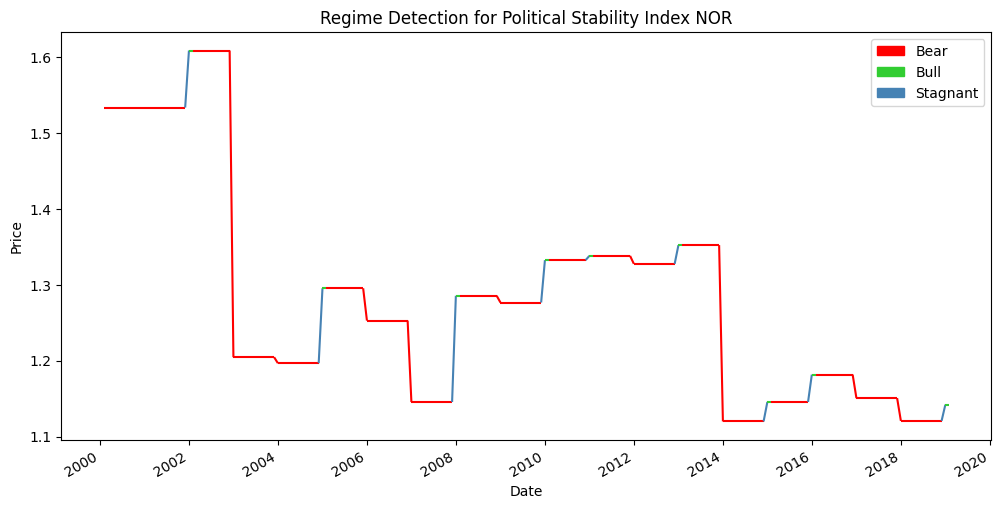

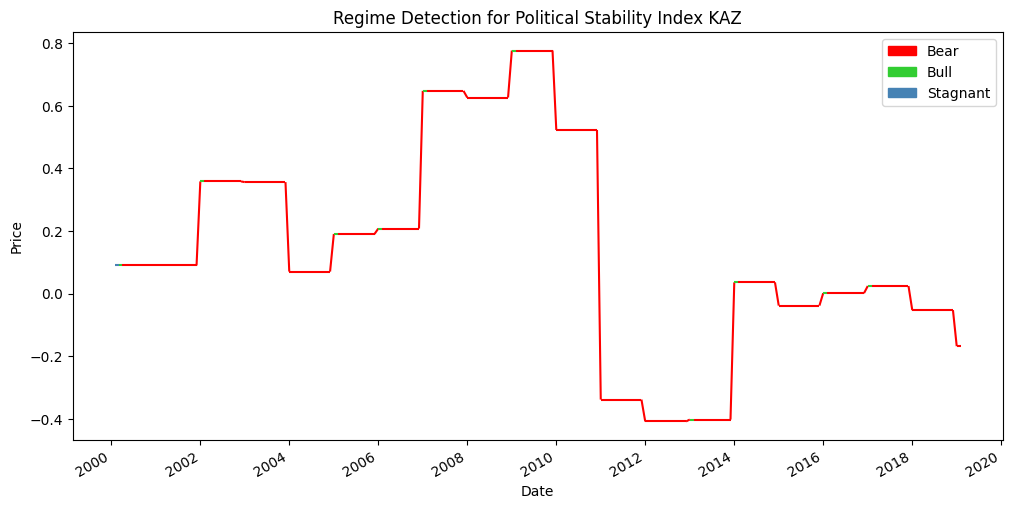

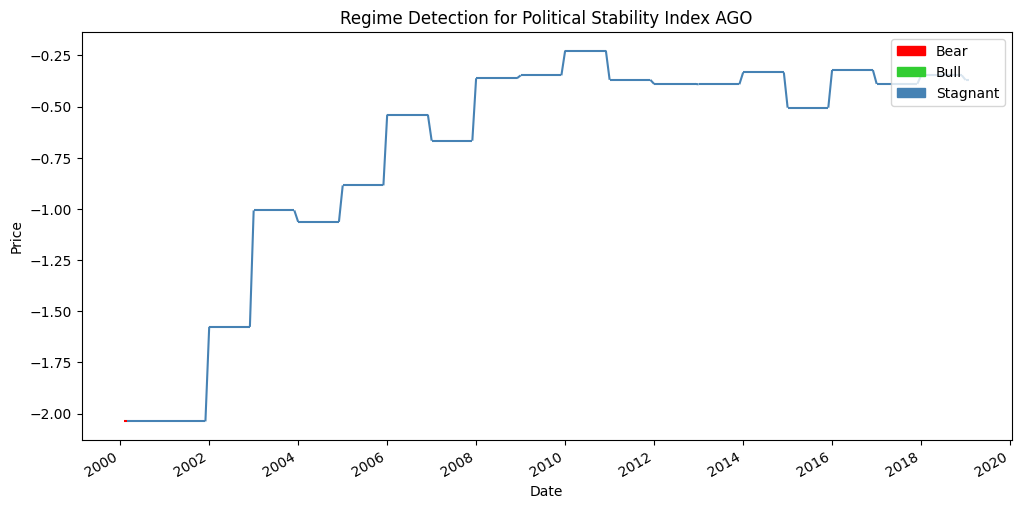

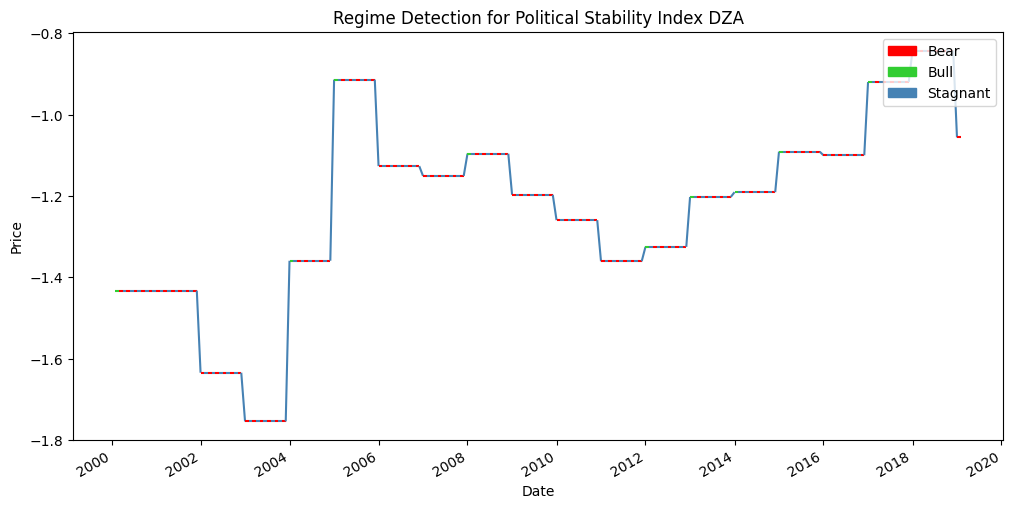

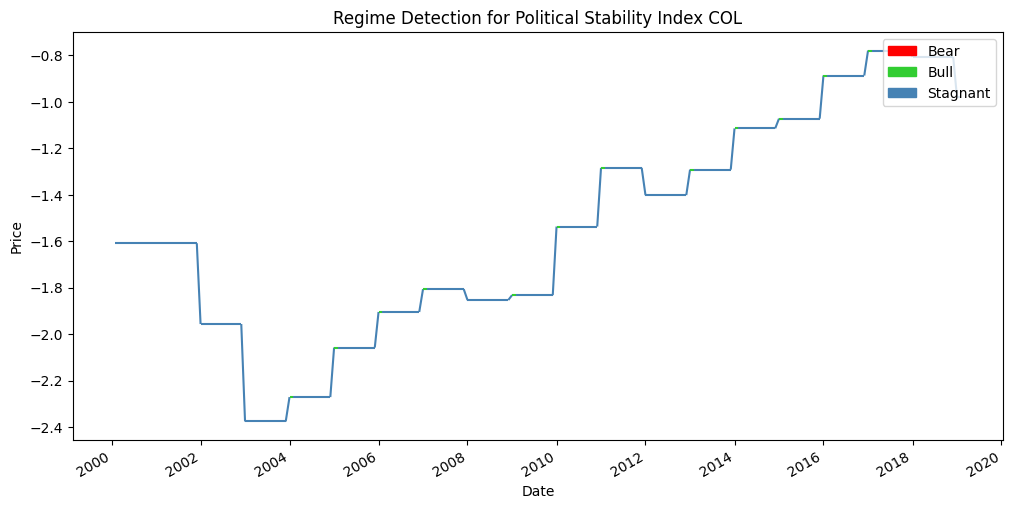

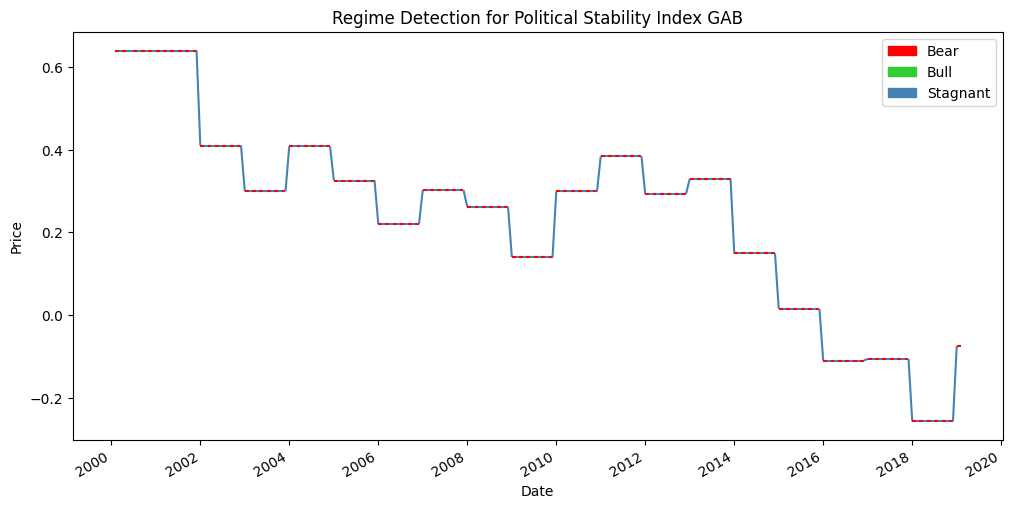

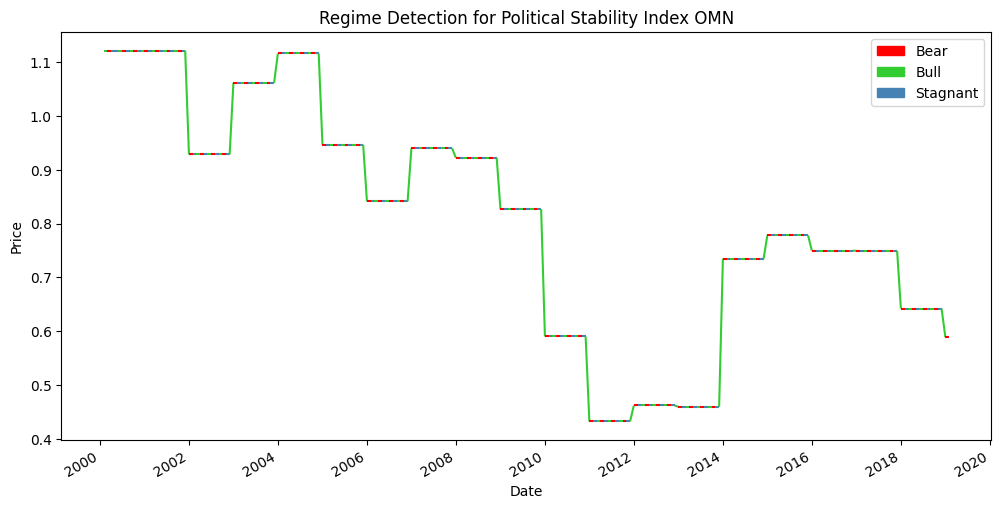

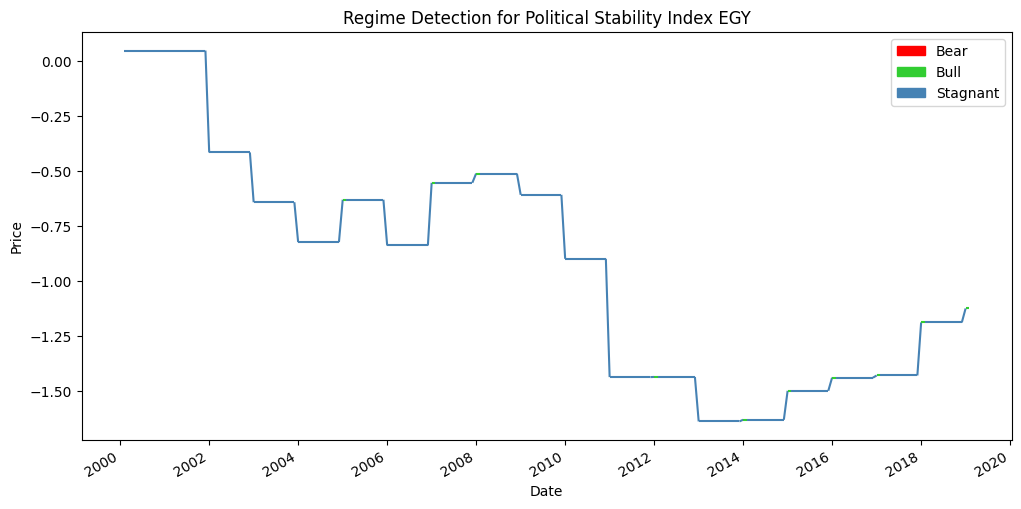

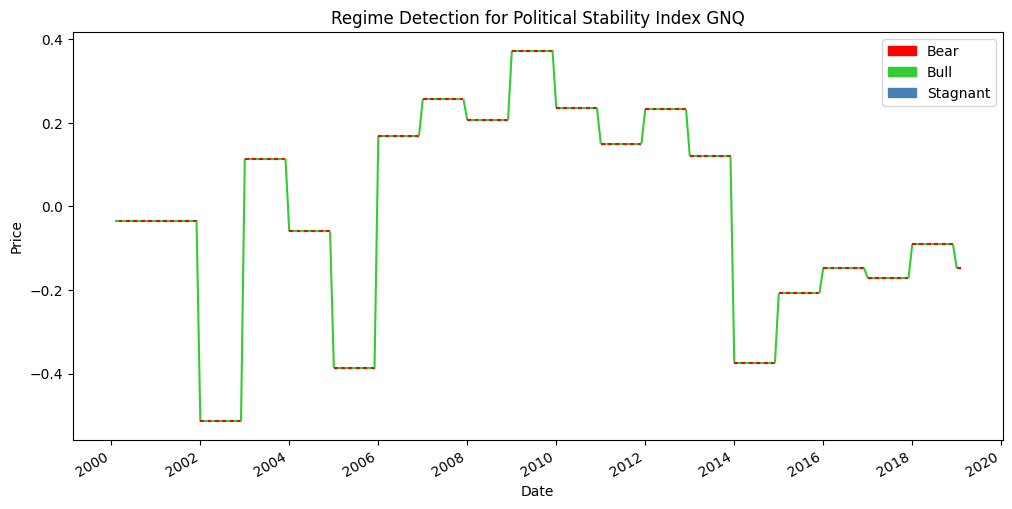

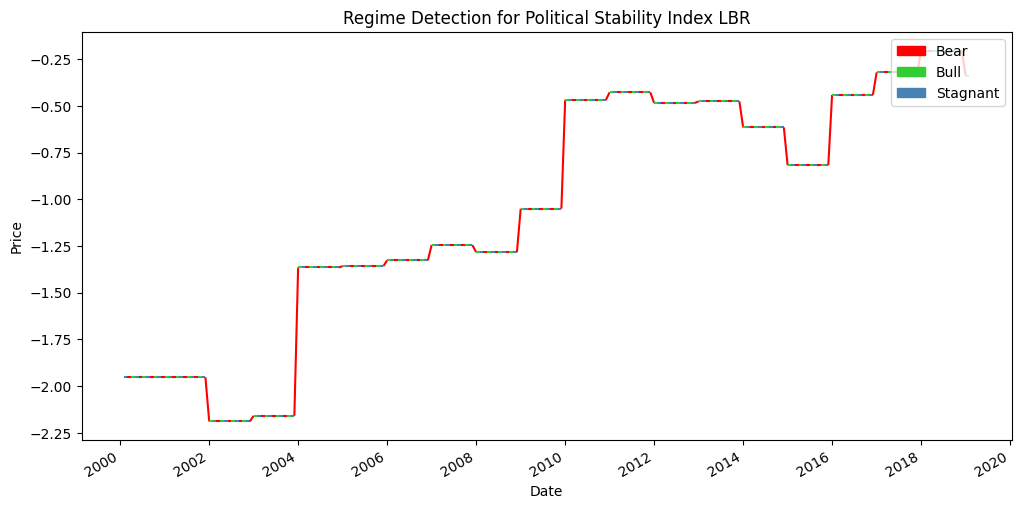

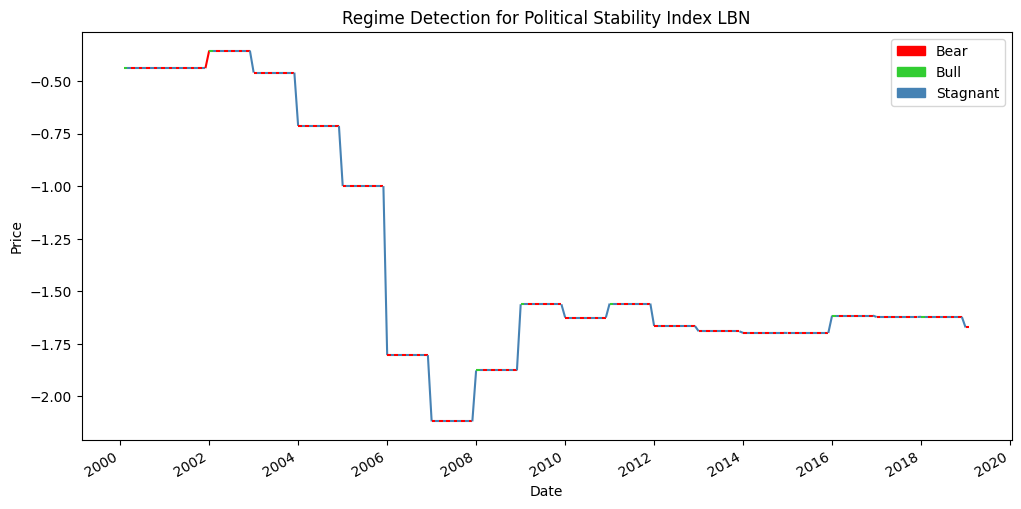

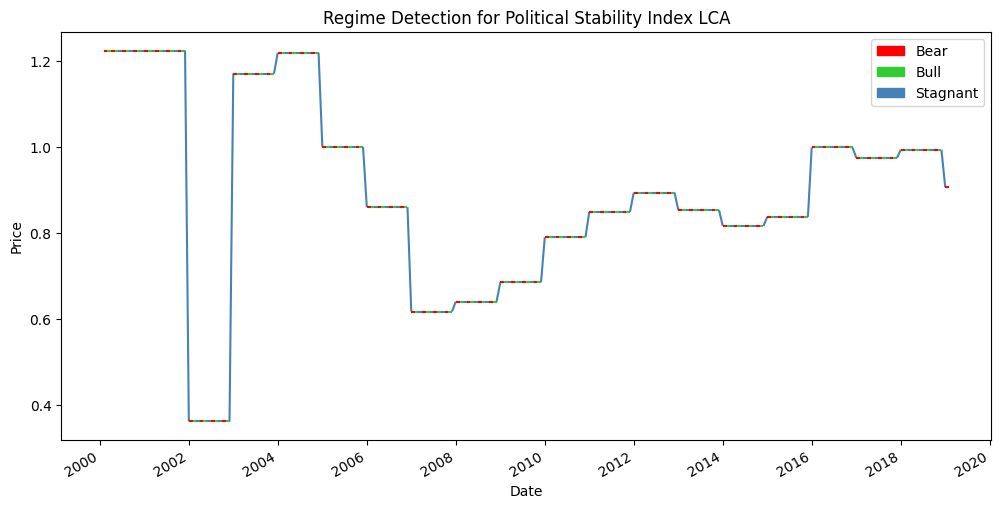

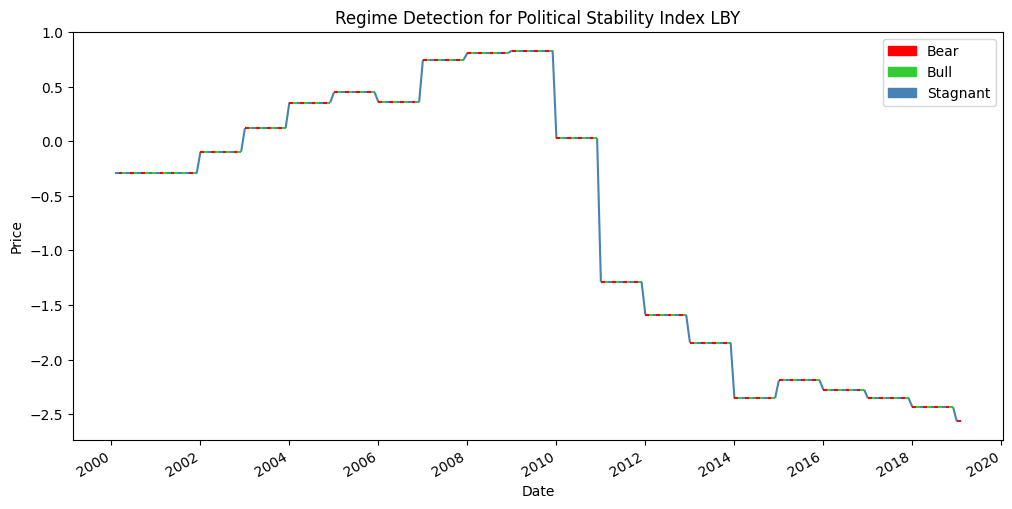

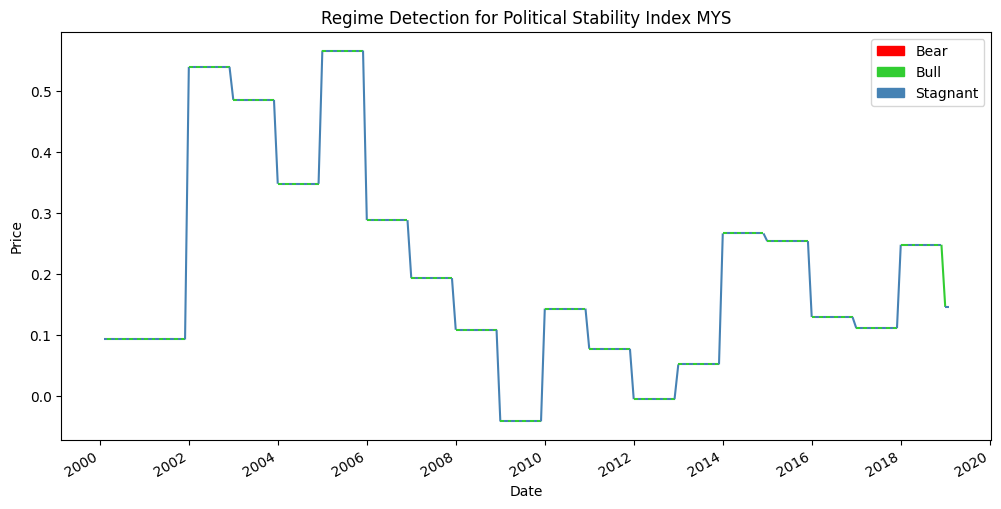

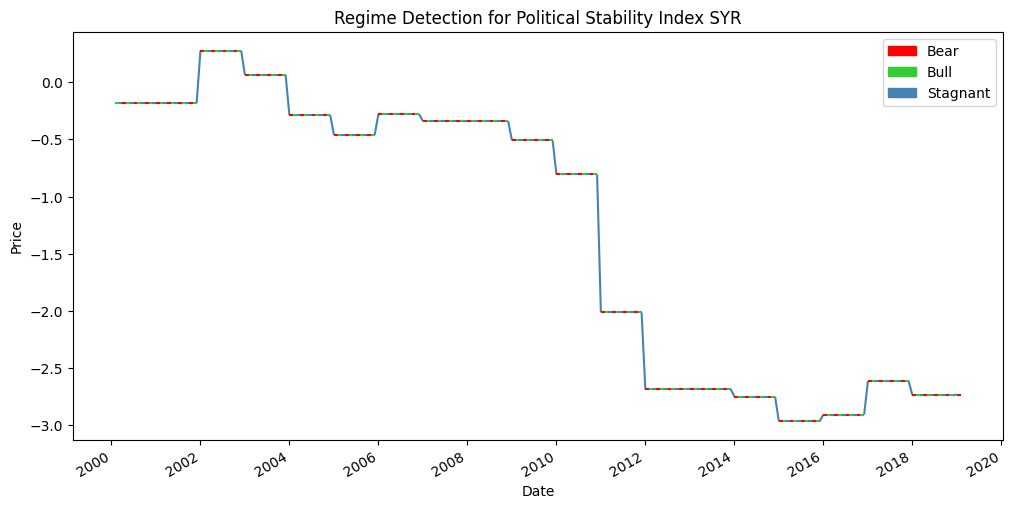

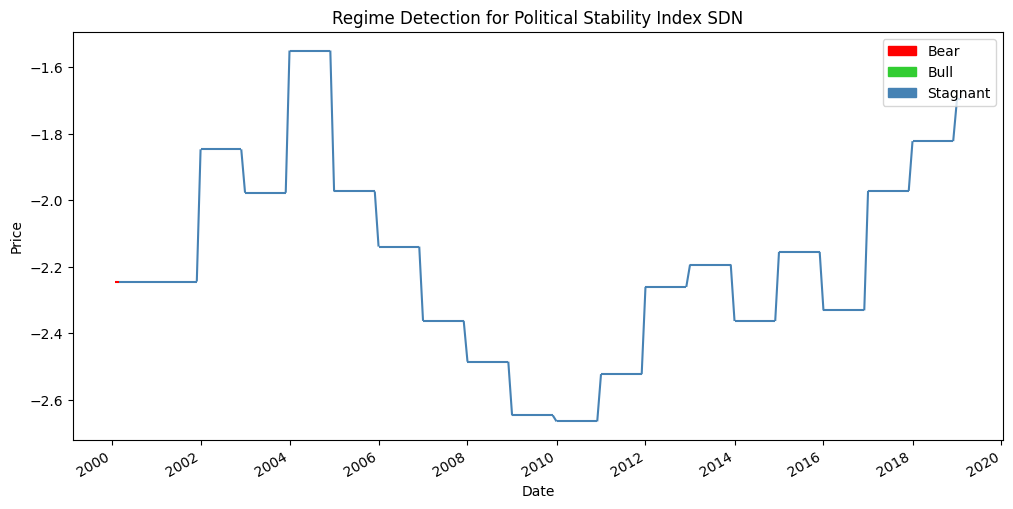

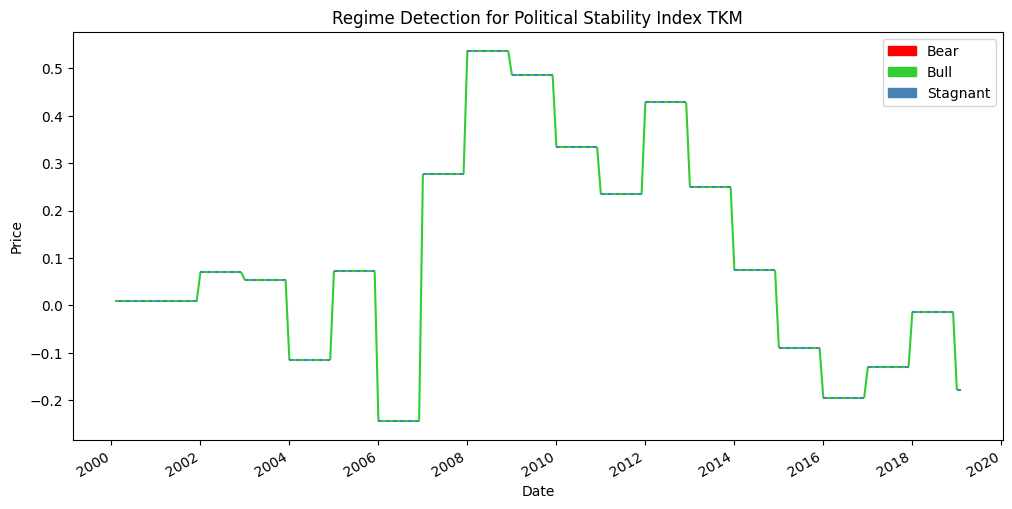

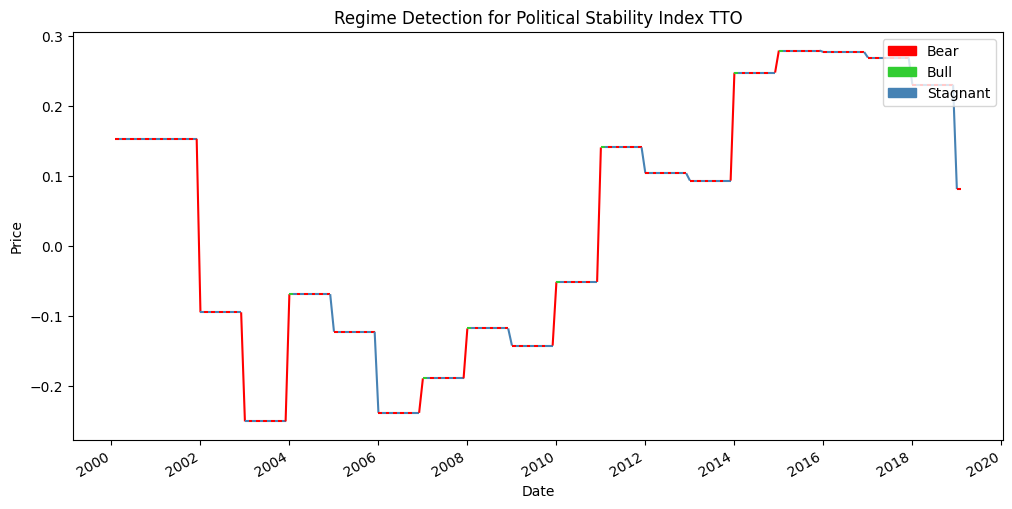

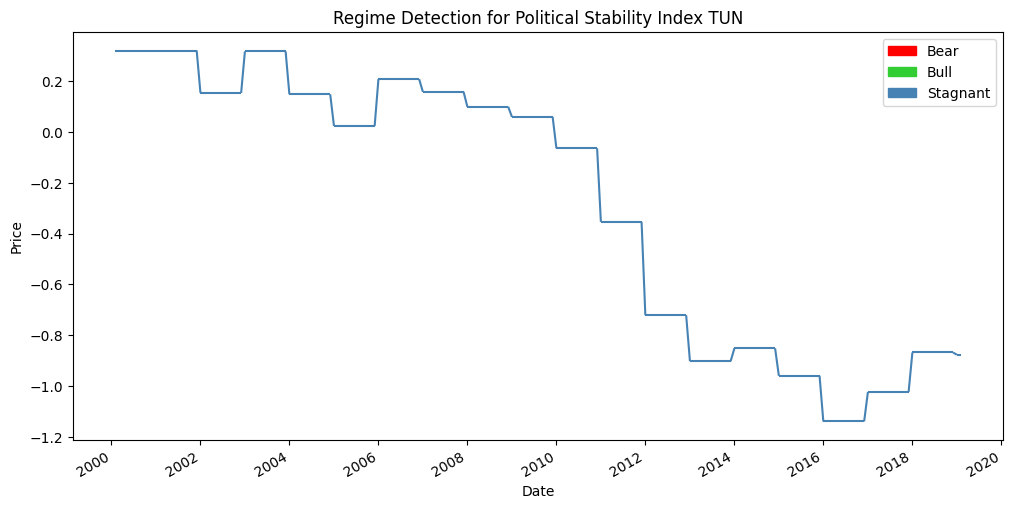

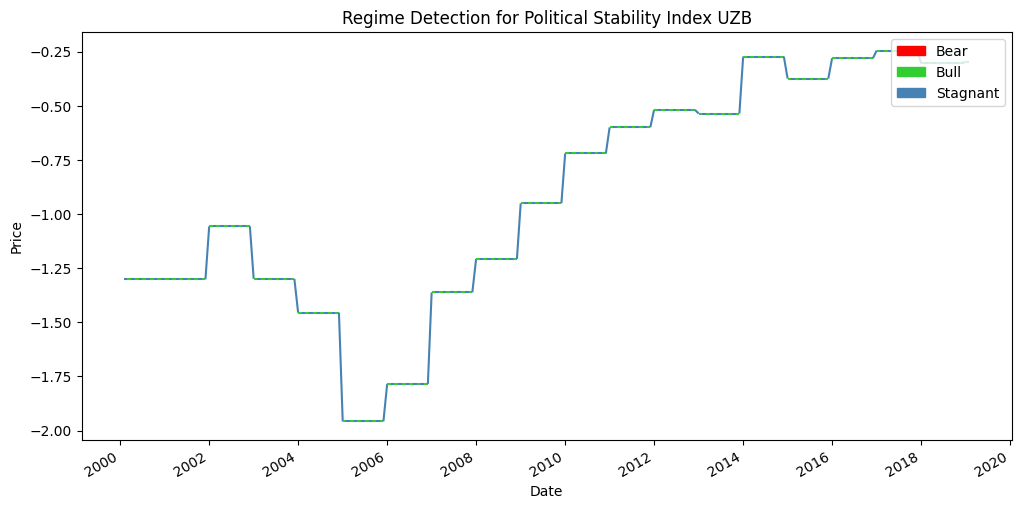

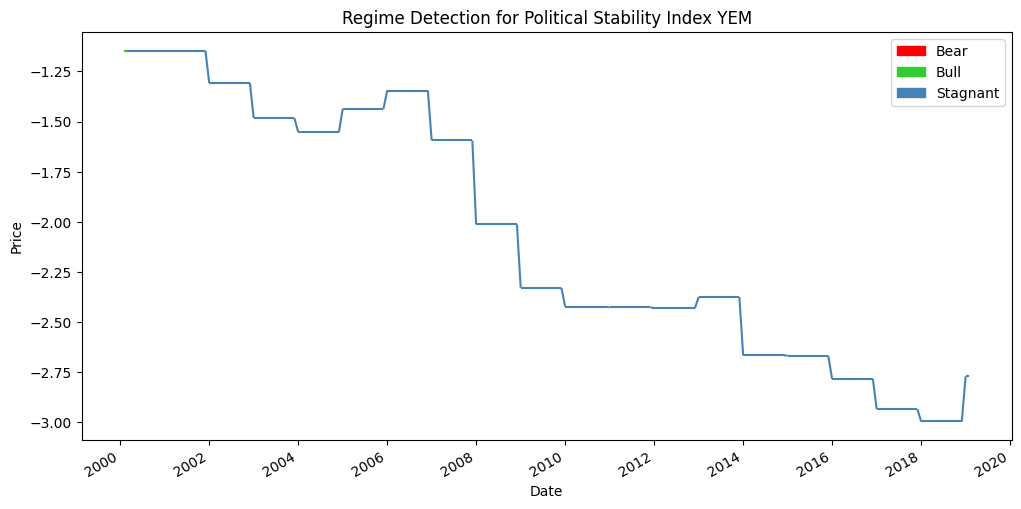

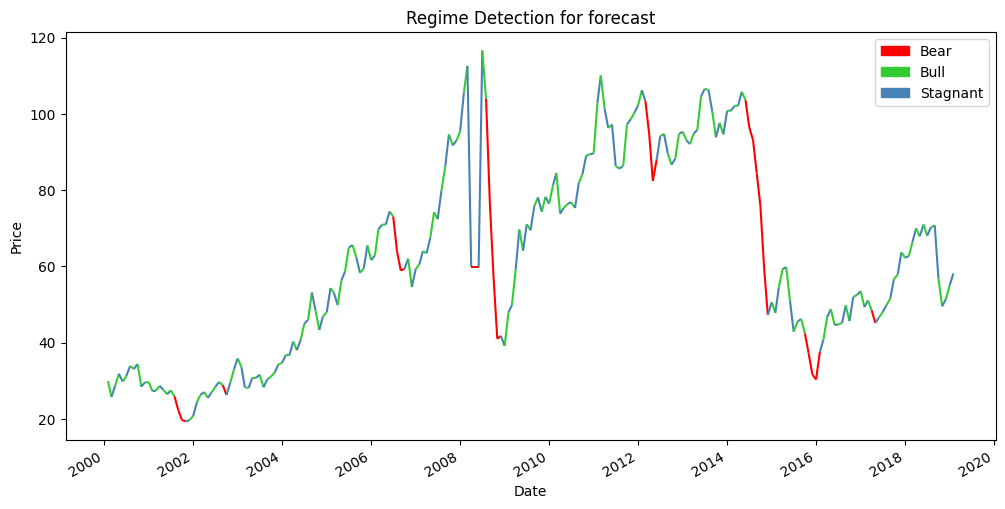

In [29]:
output_dir = "./plots/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Plotting
states = pd.read_csv("./data/train_data.csv", index_col=0)
for series_id in df.columns:

    # Create a new DataFrame for each series
    series_df = pd.DataFrame(index=train_data.index)
    series_df[series_id] = train_data[series_id]
    series_df['Diff'] = series_df[series_id].diff()
    series_df['Regime'] = states[series_id]

    # Remove the first row (which will have NaN for 'Diff')
    series_df = series_df.iloc[1:]

    # Convert index to datetime
    series_df.index = pd.to_datetime(series_df.index)

    # Get means of all assigned states
    means = series_df.groupby(['Regime'])['Diff'].mean()
    lst_1 = means.index.tolist()
    lst_2 = means.sort_values().index.tolist()
    map_regimes = dict(zip(lst_2, lst_1))
    series_df['Regime'] = series_df['Regime'].map(map_regimes)

    # Create LineCollection with color mapping based on regime
    cmap = ListedColormap(['r', 'steelblue', 'limegreen'], name='indexed')
    norm = BoundaryNorm(range(3 + 1), cmap.N)
    inxval = mdates.date2num(series_df.index.to_pydatetime())
    points = np.array([inxval, series_df[series_id]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(series_df['Regime'])

    # Plotting  data
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.add_collection(lc)
    ax.autoscale()
    ax.xaxis_date()

    # Legend
    r_patch = mpatches.Patch(color='red', label='Bear')
    g_patch = mpatches.Patch(color='limegreen', label='Bull')
    b_patch = mpatches.Patch(color='steelblue', label='Stagnant')
    ax.legend(handles=[r_patch, g_patch, b_patch], loc='best')


    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title(f'Regime Detection for {series_id}')
    fig.autofmt_xdate()


    name = "./plots/" + series_id.replace(".", "_") + ".png"
    plt.savefig(name)

In [30]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import BicScore, K2Score, BDeuScore

# Retrieve training set
train_data = pd.read_csv("./data/train_data.csv", index_col=0)

In [ ]:
# oecd_countries = ['CAN', 'MEX', 'NLD', 'NOR', 'USA']
# non_oecd_countries = ['DZA', 'AGO', 'BRA', 'CHN', 'COL', 'EGY', 'GNQ', 'GAB', 'IRN', 'IRQ', 'KAZ', 'KWT', 'LBR', 'LBN', 'LBY', 'MYS', 'NGA', 'OMN', 'QAT', 'RUS', 'LCA', 'SAU', 'SDN', 'SYR', 'TTO', 'TUN', 'TKM', 'ARE', 'UZB', 'VEN', 'YEM']

# opec_countries = ['DZA', 'AGO', 'GNQ', 'GAB', 'IRN', 'IRQ', 'KWT', 'LBY', 'NGA', 'QAT', 'SAU', 'ARE', 'VEN']
# non_opec_countries = list(set(non_oecd_countries) - set(opec_countries))

# for i in range(len(oecd_countries)):
#     oecd_countries[i] = 'Political Stability Index ' + oecd_countries[i]

# for i in range(len(non_oecd_countries)):
#     non_oecd_countries[i] = 'Political Stability Index ' + non_oecd_countries[i]

# for i in range(len(opec_countries)):
#     opec_countries[i] = 'Political Stability Index ' + opec_countries[i]

# for i in range(len(non_opec_countries)):
#     non_opec_countries[i] = 'Political Stability Index ' + non_opec_countries[i]

In [32]:
# Initialise Hill Climbing Estimator
hc = HillClimbSearch(train_data)

# Define the expert network structure
expert = BayesianNetwork()
relevant_columns = set(train_data.columns) - {'forecast'}  # Exclude the forecast column

expert.add_nodes_from(set(train_data.columns) - {'forecast'})
expert.add_edges_from([
    ('PAPR_NONOPEC', 'WTISPLC'),
    ('PAPR_OPEC', 'WTISPLC'),
    ('PATC_OECD', 'WTISPLC'),
    ('PATC_NON_OECD', 'WTISPLC')
])

# Verify that all nodes in expert network are in train_data
assert set(expert.nodes()) == relevant_columns, "Nodes in expert network do not match columns in train_data"

# Perform local hill climb search
model = hc.estimate(
    scoring_method=K2Score(train_data)
)

# Fit the model
model.fit(
    train_data,
    estimator=BayesianEstimator,
    prior_type="K2"
)

print("Learned edges:", model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
import networkx as nx
import pylab

G=nx.Graph();
G.add_edges_from(model.edges())
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 10)
nx.draw_networkx_edges(G, pos, arrows=True)
pylab.figure(5,figsize=(20,10))

Validation

In [ ]:
discrete_vald = pd.DataFrame(index=vald_data[1:].index)

for series_id in datasets:
    path = f"./hmms/{series_id.replace('.', '_')}.npz"

    if series_id == 'forecast':
        dhmm = hmms.DtHMM.from_file('./hmms/WTISPLC.npz')
    else:
        dhmm = hmms.DtHMM.from_file(path)

    data_diff = vald_data[series_id].diff()[1:]
    emit_seq = np.array(data_diff.apply(lambda x: 1 if x > 0 else 0).values.astype(int))
    (log_prob, s_seq) = dhmm.viterbi(emit_seq)

    discrete_vald[series_id] = s_seq
    discrete_vald.to_csv("./data/validation_data.csv") # Saving to CSV

In [ ]:
states = pd.read_csv("./data/validation_data.csv", index_col=0)

for series_id in datasets:

    df = pd.DataFrame(index=vald_data[1:].index)
    df[series_id] = vald_data[series_id][1:]

    # Calculate difference and assign to 'Diff' column
    df['Diff'] = df[series_id].diff()[1:]

    # Assign regime from states DataFrame
    df['Regime'] = states[series_id]

    # Calculate mean difference for each regime
    means = df.groupby('Regime')['Diff'].mean()

    # Sort regime indices by mean difference
    lst_1 = means.index.tolist()
    lst_2 = means.sort_values().index.tolist()

    # Create a mapping dictionary for regime reordering
    map_regimes = dict(zip(lst_2, lst_1))

    # Reorder regimes in the DataFrame based on mean difference
    df['Regime'] = df['Regime'].map(map_regimes)

    # Colormap and normalization for regime visualization
    cmap = ListedColormap(['r', 'steelblue', 'limegreen'], 'indexed')
    norm = BoundaryNorm(range(len(means) + 1), cmap.N)

    # Convert index to numerical values for plotting
    inxval = mdates.date2num(df[series_id].index.to_pydatetime())

    # Combine data for line collection
    points = np.array([inxval, df[series_id]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Line collection for regime visualization
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(df['Regime'])
    plt.gca().add_collection(lc)

    # Set plot limits based on series data
    plt.xlim(df[series_id].index.min(), df[series_id].index.max())
    plt.ylim(df[series_id].min(), df[series_id].max())

    # Legend for regimes
    r_patch = mpatches.Patch(color='red', label='Bear')
    g_patch = mpatches.Patch(color='limegreen', label='Bull')
    b_patch = mpatches.Patch(color='steelblue', label='Stagnant')
    plt.legend(handles=[r_patch, g_patch, b_patch])

    name = "./plots/" + series_id.replace(".", "_") + "_VALIDATION.png"
    plt.savefig(name)

In [ ]:
# Record real data observation, to be compared with the predicted one
vald_real = states['WTISPLC'].as_matrix()

# Drop the real data observation so that it does not bias prediction
vald_data_new = states.drop('forecast', axis=1)

# Inference on the constructed graphical model
vald_prediction = model.predict(vald_data_new)

# Retrieve it as an array so we can compare with real value
pred_value_vald = vald_prediction['forecast'].as_matrix()

In [ ]:
print("\nPredicted Value: ")
print(pred_value_vald)
print("\nReal Value: ")
print(vald_real)
error = np.mean(vald_real != np.roll(pred_value_vald, 1))
#error = np.mean(vald_real != pred_value_vald)
print("\nError: ")
print(error * 100)

Testing

In [ ]:
discrete_test = pd.DataFrame(index=test_data[1:].index)

for series_id in datasets:

    path = f"./hmms/{series_id.replace('.', '_')}.npz"

    # Load HMM model (special case for 'forecast')
    dhmm = hmms.DtHMM.from_file(path) if series_id != 'forecast' else hmms.DtHMM.from_file('./hmms/WTISPLC.npz')

    # Calculate difference and convert to discrete sequence
    data_diff = test_data[series_id].diff()[1:]
    emit_seq = np.array(data_diff.apply(lambda x: 1 if x > 0 else 0).values)

    # Run Viterbi algorithm to get most likely state sequence
    log_prob, s_seq = dhmm.viterbi(emit_seq)

    # Assign state sequence to DataFrame
    discrete_test[series_id] = s_seq

# Save discrete test data to CSV
discrete_test.to_csv("./data/test_data.csv", index=True)

In [ ]:
discrete_test = pd.read_csv("./data/test_data.csv", index_col=0)

# Extract real WTISPLC observation for comparison
test_real = discrete_test["WTISPLC"].to_numpy()

# Drop the 'forecast' column (real data) to avoid bias in prediction
test_data_new = discrete_test.drop("forecast", axis=1)

# Make prediction on the model with prepared test data
test_prediction = model.predict(test_data_new)

# Extract predicted WTISPLC value for comparison
pred_value_test = test_prediction["forecast"].to_numpy()

In [ ]:
print("\nPredicted Value: ")

# This is the price, not the forecast
print(pred_value_test)
print("\nReal Value: ")

print(test_real)

# Shift to get forecast
error = np.mean(test_real != np.roll(pred_value_test, 1))
#error = np.mean(test_real != pred_value_test); # Shift to get forecast
print("\nError: ")
print(error * 100)

In [ ]:
# Create DataFrames for price and predicted signal
test_price = pd.DataFrame(test_data['WTISPLC'], columns=['WTISPLC'])
test_signal = pd.DataFrame(test_prediction, columns=['forecast'])

# Combine price and signal DataFrames
test_sheet = pd.concat([test_price, test_signal], axis=1, join='inner')

# Initialize trading list and position indicator
trades = [test_sheet['WTISPLC'].iloc[0]]
position = False  # False for Short, True for Long

# Iterate through data points (excluding the first)
for i in range(1, len(test_sheet)):
    # Hold position if forecast is stagnant (0)
    if test_sheet['forecast'].iloc[i] == 0:
        trades.append(trades[-1])
    # Enter Long position if forecast is bullish (2) and not already in a position
    elif test_sheet['forecast'].iloc[i] == 2 and not position:
        position = True
        trades.append(trades[-1])  # Hold price until first buy signal
    # Buy on next price if forecast is bullish and already in a Long position
    elif test_sheet['forecast'].iloc[i] == 2 and position:
        trades.append(test_sheet['WTISPLC'].iloc[i])  # Buy at next price point
    # Hold position if forecast is bearish (1) and not already in a Short position
    elif test_sheet['forecast'].iloc[i] == 1 and not position:
        trades.append(trades[-1])  # Hold price until first sell signal
    # Sell on next price if forecast is bearish and already in a Long position
    elif test_sheet['forecast'].iloc[i] == 1 and position:
        trades.append(test_sheet['WTISPLC'].iloc[i])  # Sell at next price point
    # Hold Short position if forecast is bearish and already in a Short position
    else:  # Handles unexpected forecast values
        trades.append(trades[-1])  # Maintain previous position

# Read EIA forecast data and set matching index
eia_forecast = pd.read_csv("./data/eia_forecast.csv", index_col=0)
eia_forecast.index = test_signal.index

# Create performance DataFrame based on trades
test_performance = pd.DataFrame(trades, index=test_signal.index, columns=['performance'])

# Combine all DataFrames for plotting
test_sheet = pd.concat([test_sheet, test_performance], axis=1, join='inner')

# Plot WTI price, model performance, and EIA forecast
plt.plot(test_sheet['WTISPLC'], 'r', label='WTI Crude Oil Price')
plt.plot(test_sheet['performance'], 'g', label='Bayesian Model')
plt.plot(eia_forecast['eia_forecast'], 'b', label='EIA Forecast')

# Add legend and labels
r_patch = mpatches.Patch(color='red', label='WTI Crude Oil Price')
g_patch = mpatches.Patch(color='green', label='Bayesian Model')
b_patch = mpatches.Patch(color='blue', label='EIA Forecast')
plt.legend(handles=[r_patch, g_patch, b_patch], loc='lower right')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()